### 1.  개요 

+ 파이썬으로 구현된 쉽고 간결한 딥러닝 라이브러리
+ 구글의 엔지니어인 프랑소와 슐래가 2015년 3월에 발표
+ 내부적으로는 텐서플로우 엔진이 구동되지만 직관적인 API로 쉽게 딥러닝 실험을 할 수 있도록 지원

### 2 . 주요 특징 
+ 모듈화
+ 최소주의
+ 쉬운 확장성 
+ 파이썬 기반 

### 3. Document
    
+ https://keras.io

#### 4. 주요 객체

+ Sequential(순서대로 레이어를 쌓아 나가는 것), Model(임의대로 커스터마이징 가능)
+ Dense (하나의 완전한 FC 레이어)
+ Compile(실제로 실행할수 있는 최저비용 계산등)
    - loss (https://keras.io/ko/losses/)
        - 다중 분류 : categorical_crossentropy
        - 이진 분류 : binary_crossentropy
        - 선형 회귀 : mean_squared_error
    
    - optimizer(https://keras.io/ko/optimizers/)
        - SGD
        - RMSprop
        - Adagrad
        - Adadelta
        - Adam
        - Adamax
        - Nadam

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

#폰트 지정
import matplotlib.font_manager as fm
font_name=fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False
import keras
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from keras.optimizers import RMSprop, Adam, SGD
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

ModuleNotFoundError: No module named 'keras'

In [5]:
# keras 2.3.1
#!pip install keras==2.3.1 

#### 단순 선형 회귀

In [5]:
x_train = [1, 2, 3, 4, 5]
y_train = [2.1, 3.1, 4.1, 5.1, 6.1]


W = tf.Variable(tf.random_normal([1]), dtype = tf.float32, name="Weight")
b = tf.Variable(tf.random_normal([1]), dtype = tf.float32, name="bias")

hypot = W * x_train + b
cost = tf.reduce_mean(tf.square(hypot - y_train))



optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer(), )
for step in range(1001):
    _, c, weight, bias=sess.run([train, cost, W, b])
    if step % 10 == 0 :
        print(step, c, weight, bias)
    
    

0 6.85674 [0.81164193] [-0.3476792]
10 0.3172513 [1.3102512] [-0.16310227]
20 0.26896524 [1.3330083] [-0.11187621]
30 0.2512262 [1.324143] [-0.07090497]
40 0.23477264 [1.3134985] [-0.03187266]
50 0.21939726 [1.3030691] [0.0058213]
60 0.2050287 [1.2929777] [0.04225745]
70 0.19160122 [1.2832216] [0.07748008]
80 0.17905316 [1.2737904] [0.1115298]
90 0.16732672 [1.2646731] [0.14444575]
100 0.15636842 [1.2558596] [0.17626555]
110 0.14612773 [1.2473394] [0.2070258]
120 0.13655767 [1.2391032] [0.23676175]
130 0.1276144 [1.2311411] [0.26550743]
140 0.11925683 [1.2234441] [0.2932959]
150 0.111446604 [1.2160034] [0.320159]
160 0.10414793 [1.2088106] [0.3461275]
170 0.09732713 [1.2018572] [0.37123138]
180 0.09095313 [1.1951354] [0.39549923]
190 0.08499652 [1.1886375] [0.41895902]
200 0.07943004 [1.1823559] [0.4416375]
210 0.07422814 [1.1762834] [0.46356082]
220 0.06936688 [1.1704131] [0.48475415]
230 0.06482394 [1.1647385] [0.50524175]
240 0.060578592 [1.1592528] [0.5250471]
250 0.05661126 [1.153

Epoch 1/2000
5/5 [==============================] - 0s 19ms/step - loss: 33.7970
Epoch 2/2000
5/5 [==============================] - 0s 199us/step - loss: 33.3056
Epoch 3/2000
5/5 [==============================] - 0s 195us/step - loss: 32.8179
Epoch 4/2000
5/5 [==============================] - 0s 199us/step - loss: 32.3340
Epoch 5/2000
5/5 [==============================] - 0s 203us/step - loss: 31.8538
Epoch 6/2000
5/5 [==============================] - 0s 396us/step - loss: 31.3776
Epoch 7/2000
5/5 [==============================] - 0s 599us/step - loss: 30.9053
Epoch 8/2000
5/5 [==============================] - 0s 200us/step - loss: 30.4370
Epoch 9/2000
5/5 [==============================] - 0s 194us/step - loss: 29.9727
Epoch 10/2000
5/5 [==============================] - 0s 199us/step - loss: 29.5125
Epoch 11/2000
5/5 [==============================] - 0s 200us/step - loss: 29.0565
Epoch 12/2000
5/5 [==============================] - 0s 199us/step - loss: 28.6046
Epoch 13/2000


Epoch 101/2000
5/5 [==============================] - 0s 194us/step - loss: 4.9387
Epoch 102/2000
5/5 [==============================] - 0s 199us/step - loss: 4.8219
Epoch 103/2000
5/5 [==============================] - 0s 205us/step - loss: 4.7074
Epoch 104/2000
5/5 [==============================] - 0s 0us/step - loss: 4.5952
Epoch 105/2000
5/5 [==============================] - 0s 200us/step - loss: 4.4853
Epoch 106/2000
5/5 [==============================] - 0s 199us/step - loss: 4.3775
Epoch 107/2000
5/5 [==============================] - 0s 0us/step - loss: 4.2719
Epoch 108/2000
5/5 [==============================] - 0s 194us/step - loss: 4.1685
Epoch 109/2000
5/5 [==============================] - 0s 200us/step - loss: 4.0675
Epoch 110/2000
5/5 [==============================] - 0s 399us/step - loss: 3.9683
Epoch 111/2000
5/5 [==============================] - 0s 199us/step - loss: 3.8714
Epoch 112/2000
5/5 [==============================] - 0s 204us/step - loss: 3.7762
Epoch 11

Epoch 201/2000
5/5 [==============================] - 0s 0us/step - loss: 0.2792
Epoch 202/2000
5/5 [==============================] - 0s 200us/step - loss: 0.2701
Epoch 203/2000
5/5 [==============================] - 0s 199us/step - loss: 0.2613
Epoch 204/2000
5/5 [==============================] - 0s 205us/step - loss: 0.2527
Epoch 205/2000
5/5 [==============================] - 0s 394us/step - loss: 0.2444
Epoch 206/2000
5/5 [==============================] - 0s 204us/step - loss: 0.2364
Epoch 207/2000
5/5 [==============================] - 0s 0us/step - loss: 0.2286
Epoch 208/2000
5/5 [==============================] - 0s 199us/step - loss: 0.2210
Epoch 209/2000
5/5 [==============================] - 0s 199us/step - loss: 0.2137
Epoch 210/2000
5/5 [==============================] - 0s 0us/step - loss: 0.2067
Epoch 211/2000
5/5 [==============================] - 0s 200us/step - loss: 0.1998
Epoch 212/2000
5/5 [==============================] - 0s 204us/step - loss: 0.1932
Epoch 213/

Epoch 300/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0161
Epoch 301/2000
5/5 [==============================] - 0s 200us/step - loss: 0.0158
Epoch 302/2000
5/5 [==============================] - 0s 200us/step - loss: 0.0156
Epoch 303/2000
5/5 [==============================] - 0s 200us/step - loss: 0.0154
Epoch 304/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0152
Epoch 305/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0150
Epoch 306/2000
5/5 [==============================] - 0s 0us/step - loss: 0.0148
Epoch 307/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0146
Epoch 308/2000
5/5 [==============================] - 0s 200us/step - loss: 0.0144
Epoch 309/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0143
Epoch 310/2000
5/5 [==============================] - 0s 0us/step - loss: 0.0141
Epoch 311/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0140
Epoch 31

Epoch 399/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0098
Epoch 400/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0097
Epoch 401/2000
5/5 [==============================] - 0s 200us/step - loss: 0.0097
Epoch 402/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0097
Epoch 403/2000
5/5 [==============================] - 0s 200us/step - loss: 0.0097
Epoch 404/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0097
Epoch 405/2000
5/5 [==============================] - 0s 200us/step - loss: 0.0097
Epoch 406/2000
5/5 [==============================] - 0s 0us/step - loss: 0.0096
Epoch 407/2000
5/5 [==============================] - 0s 200us/step - loss: 0.0096
Epoch 408/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0096
Epoch 409/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0096
Epoch 410/2000
5/5 [==============================] - 0s 200us/step - loss: 0.0096
Epoch 

Epoch 498/2000
5/5 [==============================] - 0s 200us/step - loss: 0.0082
Epoch 499/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0082
Epoch 500/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0082
Epoch 501/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0082
Epoch 502/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0082
Epoch 503/2000
5/5 [==============================] - 0s 200us/step - loss: 0.0082
Epoch 504/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0081
Epoch 505/2000
5/5 [==============================] - 0s 200us/step - loss: 0.0081
Epoch 506/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0081
Epoch 507/2000
5/5 [==============================] - 0s 200us/step - loss: 0.0081
Epoch 508/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0081
Epoch 509/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0081
Epoc

Epoch 597/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0068
Epoch 598/2000
5/5 [==============================] - 0s 0us/step - loss: 0.0068
Epoch 599/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0068
Epoch 600/2000
5/5 [==============================] - 0s 200us/step - loss: 0.0068
Epoch 601/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0068
Epoch 602/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0067
Epoch 603/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0067
Epoch 604/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0067
Epoch 605/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0067
Epoch 606/2000
5/5 [==============================] - 0s 399us/step - loss: 0.0067
Epoch 607/2000
5/5 [==============================] - 0s 399us/step - loss: 0.0067
Epoch 608/2000
5/5 [==============================] - 0s 0us/step - loss: 0.0067
Epoch 60

Epoch 696/2000
5/5 [==============================] - 0s 200us/step - loss: 0.0055
Epoch 697/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0055
Epoch 698/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0055
Epoch 699/2000
5/5 [==============================] - 0s 200us/step - loss: 0.0055
Epoch 700/2000
5/5 [==============================] - 0s 399us/step - loss: 0.0055
Epoch 701/2000
5/5 [==============================] - 0s 399us/step - loss: 0.0055
Epoch 702/2000
5/5 [==============================] - 0s 200us/step - loss: 0.0054
Epoch 703/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0054
Epoch 704/2000
5/5 [==============================] - 0s 399us/step - loss: 0.0054
Epoch 705/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0054
Epoch 706/2000
5/5 [==============================] - 0s 200us/step - loss: 0.0054
Epoch 707/2000
5/5 [==============================] - 0s 399us/step - loss: 0.0054
Epoc

Epoch 796/2000
5/5 [==============================] - 0s 0us/step - loss: 0.0044
Epoch 797/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0043
Epoch 798/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0043
Epoch 799/2000
5/5 [==============================] - 0s 200us/step - loss: 0.0043
Epoch 800/2000
5/5 [==============================] - 0s 0us/step - loss: 0.0043
Epoch 801/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0043
Epoch 802/2000
5/5 [==============================] - 0s 200us/step - loss: 0.0043
Epoch 803/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0043
Epoch 804/2000
5/5 [==============================] - 0s 0us/step - loss: 0.0043
Epoch 805/2000
5/5 [==============================] - 0s 200us/step - loss: 0.0043
Epoch 806/2000
5/5 [==============================] - 0s 200us/step - loss: 0.0042
Epoch 807/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0042
Epoch 808/

5/5 [==============================] - 0s 0us/step - loss: 0.0034
Epoch 896/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0034
Epoch 897/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0033
Epoch 898/2000
5/5 [==============================] - 0s 399us/step - loss: 0.0033
Epoch 899/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0033
Epoch 900/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0033
Epoch 901/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0033
Epoch 902/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0033
Epoch 903/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0033
Epoch 904/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0033
Epoch 905/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0033
Epoch 906/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0033
Epoch 907/2000
5/5 [=

Epoch 995/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0025
Epoch 996/2000
5/5 [==============================] - 0s 205us/step - loss: 0.0025
Epoch 997/2000
5/5 [==============================] - 0s 200us/step - loss: 0.0025
Epoch 998/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0025
Epoch 999/2000
5/5 [==============================] - 0s 399us/step - loss: 0.0025
Epoch 1000/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0025
Epoch 1001/2000
5/5 [==============================] - 0s 200us/step - loss: 0.0025
Epoch 1002/2000
5/5 [==============================] - 0s 205us/step - loss: 0.0025
Epoch 1003/2000
5/5 [==============================] - 0s 194us/step - loss: 0.0025
Epoch 1004/2000
5/5 [==============================] - 0s 0us/step - loss: 0.0025
Epoch 1005/2000
5/5 [==============================] - 0s 194us/step - loss: 0.0025
Epoch 1006/2000
5/5 [==============================] - 0s 200us/step - loss: 0.0025

Epoch 1093/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0019
Epoch 1094/2000
5/5 [==============================] - 0s 0us/step - loss: 0.0019
Epoch 1095/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0019
Epoch 1096/2000
5/5 [==============================] - 0s 200us/step - loss: 0.0019
Epoch 1097/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0019
Epoch 1098/2000
5/5 [==============================] - 0s 399us/step - loss: 0.0019
Epoch 1099/2000
5/5 [==============================] - 0s 399us/step - loss: 0.0018
Epoch 1100/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0018
Epoch 1101/2000
5/5 [==============================] - 0s 205us/step - loss: 0.0018
Epoch 1102/2000
5/5 [==============================] - 0s 200us/step - loss: 0.0018
Epoch 1103/2000
5/5 [==============================] - 0s 204us/step - loss: 0.0018
Epoch 1104/2000
5/5 [==============================] - 0s 200us/step - loss: 0

Epoch 1191/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0014
Epoch 1192/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0014
Epoch 1193/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0014
Epoch 1194/2000
5/5 [==============================] - 0s 0us/step - loss: 0.0013
Epoch 1195/2000
5/5 [==============================] - 0s 399us/step - loss: 0.0013
Epoch 1196/2000
5/5 [==============================] - 0s 200us/step - loss: 0.0013
Epoch 1197/2000
5/5 [==============================] - 0s 197us/step - loss: 0.0013
Epoch 1198/2000
5/5 [==============================] - 0s 200us/step - loss: 0.0013
Epoch 1199/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0013
Epoch 1200/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0013
Epoch 1201/2000
5/5 [==============================] - 0s 199us/step - loss: 0.0013
Epoch 1202/2000
5/5 [==============================] - 0s 199us/step - loss: 0

Epoch 1289/2000
5/5 [==============================] - 0s 204us/step - loss: 9.6203e-04
Epoch 1290/2000
5/5 [==============================] - 0s 200us/step - loss: 9.5850e-04
Epoch 1291/2000
5/5 [==============================] - 0s 0us/step - loss: 9.5499e-04
Epoch 1292/2000
5/5 [==============================] - 0s 200us/step - loss: 9.5150e-04
Epoch 1293/2000
5/5 [==============================] - 0s 205us/step - loss: 9.4800e-04
Epoch 1294/2000
5/5 [==============================] - 0s 194us/step - loss: 9.4453e-04
Epoch 1295/2000
5/5 [==============================] - 0s 0us/step - loss: 9.4105e-04
Epoch 1296/2000
5/5 [==============================] - 0s 194us/step - loss: 9.3760e-04
Epoch 1297/2000
5/5 [==============================] - 0s 399us/step - loss: 9.3414e-04
Epoch 1298/2000
5/5 [==============================] - 0s 199us/step - loss: 9.3071e-04
Epoch 1299/2000
5/5 [==============================] - 0s 200us/step - loss: 9.2728e-04
Epoch 1300/2000
5/5 [===============

Epoch 1383/2000
5/5 [==============================] - 0s 204us/step - loss: 6.7374e-04
Epoch 1384/2000
5/5 [==============================] - 0s 200us/step - loss: 6.7112e-04
Epoch 1385/2000
5/5 [==============================] - 0s 200us/step - loss: 6.6850e-04
Epoch 1386/2000
5/5 [==============================] - 0s 199us/step - loss: 6.6588e-04
Epoch 1387/2000
5/5 [==============================] - 0s 205us/step - loss: 6.6328e-04
Epoch 1388/2000
5/5 [==============================] - 0s 194us/step - loss: 6.6067e-04
Epoch 1389/2000
5/5 [==============================] - 0s 0us/step - loss: 6.5809e-04
Epoch 1390/2000
5/5 [==============================] - 0s 194us/step - loss: 6.5551e-04
Epoch 1391/2000
5/5 [==============================] - 0s 199us/step - loss: 6.5293e-04
Epoch 1392/2000
5/5 [==============================] - 0s 200us/step - loss: 6.5037e-04
Epoch 1393/2000
5/5 [==============================] - 0s 199us/step - loss: 6.4781e-04
Epoch 1394/2000
5/5 [=============

Epoch 1477/2000
5/5 [==============================] - 0s 399us/step - loss: 4.6088e-04
Epoch 1478/2000
5/5 [==============================] - 0s 399us/step - loss: 4.5897e-04
Epoch 1479/2000
5/5 [==============================] - 0s 199us/step - loss: 4.5706e-04
Epoch 1480/2000
5/5 [==============================] - 0s 199us/step - loss: 4.5515e-04
Epoch 1481/2000
5/5 [==============================] - 0s 200us/step - loss: 4.5326e-04
Epoch 1482/2000
5/5 [==============================] - 0s 204us/step - loss: 4.5136e-04
Epoch 1483/2000
5/5 [==============================] - 0s 0us/step - loss: 4.4948e-04
Epoch 1484/2000
5/5 [==============================] - 0s 0us/step - loss: 4.4760e-04
Epoch 1485/2000
5/5 [==============================] - 0s 195us/step - loss: 4.4573e-04
Epoch 1486/2000
5/5 [==============================] - 0s 205us/step - loss: 4.4387e-04
Epoch 1487/2000
5/5 [==============================] - 0s 194us/step - loss: 4.4201e-04
Epoch 1488/2000
5/5 [===============

Epoch 1571/2000
5/5 [==============================] - 0s 199us/step - loss: 3.0768e-04
Epoch 1572/2000
5/5 [==============================] - 0s 199us/step - loss: 3.0632e-04
Epoch 1573/2000
5/5 [==============================] - 0s 199us/step - loss: 3.0496e-04
Epoch 1574/2000
5/5 [==============================] - 0s 200us/step - loss: 3.0362e-04
Epoch 1575/2000
5/5 [==============================] - 0s 200us/step - loss: 3.0227e-04
Epoch 1576/2000
5/5 [==============================] - 0s 205us/step - loss: 3.0093e-04
Epoch 1577/2000
5/5 [==============================] - 0s 0us/step - loss: 2.9960e-04
Epoch 1578/2000
5/5 [==============================] - 0s 201us/step - loss: 2.9827e-04
Epoch 1579/2000
5/5 [==============================] - 0s 194us/step - loss: 2.9694e-04
Epoch 1580/2000
5/5 [==============================] - 0s 199us/step - loss: 2.9562e-04
Epoch 1581/2000
5/5 [==============================] - 0s 0us/step - loss: 2.9431e-04
Epoch 1582/2000
5/5 [===============

Epoch 1665/2000
5/5 [==============================] - 0s 194us/step - loss: 2.0028e-04
Epoch 1666/2000
5/5 [==============================] - 0s 204us/step - loss: 1.9934e-04
Epoch 1667/2000
5/5 [==============================] - 0s 305us/step - loss: 1.9841e-04
Epoch 1668/2000
5/5 [==============================] - 0s 203us/step - loss: 1.9747e-04
Epoch 1669/2000
5/5 [==============================] - 0s 194us/step - loss: 1.9655e-04
Epoch 1670/2000
5/5 [==============================] - 0s 0us/step - loss: 1.9562e-04
Epoch 1671/2000
5/5 [==============================] - 0s 205us/step - loss: 1.9470e-04
Epoch 1672/2000
5/5 [==============================] - 0s 194us/step - loss: 1.9378e-04
Epoch 1673/2000
5/5 [==============================] - 0s 194us/step - loss: 1.9287e-04
Epoch 1674/2000
5/5 [==============================] - 0s 199us/step - loss: 1.9195e-04
Epoch 1675/2000
5/5 [==============================] - 0s 399us/step - loss: 1.9105e-04
Epoch 1676/2000
5/5 [=============

Epoch 1759/2000
5/5 [==============================] - 0s 205us/step - loss: 1.2700e-04
Epoch 1760/2000
5/5 [==============================] - 0s 0us/step - loss: 1.2636e-04
Epoch 1761/2000
5/5 [==============================] - 0s 199us/step - loss: 1.2573e-04
Epoch 1762/2000
5/5 [==============================] - 0s 200us/step - loss: 1.2511e-04
Epoch 1763/2000
5/5 [==============================] - 0s 199us/step - loss: 1.2448e-04
Epoch 1764/2000
5/5 [==============================] - 0s 0us/step - loss: 1.2386e-04
Epoch 1765/2000
5/5 [==============================] - 0s 399us/step - loss: 1.2324e-04
Epoch 1766/2000
5/5 [==============================] - 0s 199us/step - loss: 1.2263e-04
Epoch 1767/2000
5/5 [==============================] - 0s 199us/step - loss: 1.2201e-04
Epoch 1768/2000
5/5 [==============================] - 0s 199us/step - loss: 1.2140e-04
Epoch 1769/2000
5/5 [==============================] - 0s 200us/step - loss: 1.2080e-04
Epoch 1770/2000
5/5 [===============

Epoch 1853/2000
5/5 [==============================] - 0s 205us/step - loss: 7.8361e-05
Epoch 1854/2000
5/5 [==============================] - 0s 199us/step - loss: 7.7949e-05
Epoch 1855/2000
5/5 [==============================] - 0s 199us/step - loss: 7.7536e-05
Epoch 1856/2000
5/5 [==============================] - 0s 202us/step - loss: 7.7128e-05
Epoch 1857/2000
5/5 [==============================] - 0s 0us/step - loss: 7.6722e-05
Epoch 1858/2000
5/5 [==============================] - 0s 194us/step - loss: 7.6314e-05
Epoch 1859/2000
5/5 [==============================] - 0s 200us/step - loss: 7.5911e-05
Epoch 1860/2000
5/5 [==============================] - 0s 205us/step - loss: 7.5509e-05
Epoch 1861/2000
5/5 [==============================] - 0s 199us/step - loss: 7.5107e-05
Epoch 1862/2000
5/5 [==============================] - 0s 204us/step - loss: 7.4711e-05
Epoch 1863/2000
5/5 [==============================] - 0s 200us/step - loss: 7.4315e-05
Epoch 1864/2000
5/5 [=============

Epoch 1947/2000
5/5 [==============================] - 0s 199us/step - loss: 4.6993e-05
Epoch 1948/2000
5/5 [==============================] - 0s 203us/step - loss: 4.6729e-05
Epoch 1949/2000
5/5 [==============================] - 0s 199us/step - loss: 4.6469e-05
Epoch 1950/2000
5/5 [==============================] - 0s 199us/step - loss: 4.6209e-05
Epoch 1951/2000
5/5 [==============================] - 0s 194us/step - loss: 4.5951e-05
Epoch 1952/2000
5/5 [==============================] - 0s 0us/step - loss: 4.5695e-05
Epoch 1953/2000
5/5 [==============================] - 0s 199us/step - loss: 4.5439e-05
Epoch 1954/2000
5/5 [==============================] - 0s 199us/step - loss: 4.5185e-05
Epoch 1955/2000
5/5 [==============================] - 0s 0us/step - loss: 4.4932e-05
Epoch 1956/2000
5/5 [==============================] - 0s 199us/step - loss: 4.4680e-05
Epoch 1957/2000
5/5 [==============================] - 0s 199us/step - loss: 4.4429e-05
Epoch 1958/2000
5/5 [===============

[[2.1097953]]
[[7.090188]]


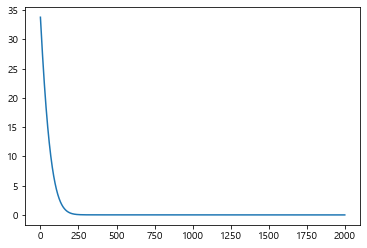

In [23]:
x_train = [1, 2, 3, 4, 5]
y_train = [2.1, 3.1, 4.1, 5.1, 6.1]

model = Sequential() 
model.add(Dense(1, input_shape=(1,)))  
#(출력갯수, input_shape=(입력갯수)) -> W, b, hypot
# units 안에 노드들은 몇개를 쓸 것인가?
model.compile(loss = "mse", optimizer=keras.optimizers.Adam(lr = 0.01)) # cost ~ train 

hist = model.fit(x_train, y_train, epochs = 2000) # sess부터 반복문 끝까지 실제 학습시키는 
# loss 는 비용 

model.get_weights()
# 가중치와 바이어스를 보고 싶을 때 

# loss의 누적값을 이용하여 그래프 확인
print(hist.history.keys())
print(hist.history["loss"])
# 학습하면서 모아놨던 모든 loss를 리스트에 담아서 볼 수 있다. -> 그래프 그릴때 사용한다.
plt.plot(hist.history["loss"]) # 비용이 어떻게 학습하는지 한번에 볼수 있다.

# 예측값 확인
print(model.predict([1]))
print(model.predict([6]))

In [31]:

x_data = [1, 2, 3, 4, 5, 6, 7] #시간
y_data = [25000, 55000, 75000, 110000, 128000, 155000, 180000] #매출액

X = tf.placeholder(tf.float32, shape=[None])
y = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), dtype = tf.float32, name="Weight") #name은 생략가능
b = tf.Variable(tf.random_normal([1]), dtype = tf.float32, name="bias")


hypot = W * X + b

cost = tf.reduce_mean(tf.square(hypot - y))


optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) #준비만 한것 
train = optimizer.minimize(cost) #최소값을 찾아가는 동작을 하는 함수 


sess = tf.Session()
sess.run(tf.global_variables_initializer(), )
for step in range(1001):
    _, c, weight, bias=sess.run([train, cost, W, b], feed_dict={X:x_data,
                                                       y: y_data })
    if step % 10 == 0 :
        print(step, c, weight, bias)
    

0 13456293000.0 [10370.733] [2079.4421]
10 11321394.0 [24878.605] [4868.037]
20 10858375.0 [24971.598] [4751.012]
30 10693338.0 [24997.26] [4625.522]
40 10540539.0 [25021.658] [4504.7134]
50 10399071.0 [25045.133] [4388.47]
60 10268091.0 [25067.72] [4276.619]
70 10146818.0 [25089.453] [4168.9937]
80 10034550.0 [25110.365] [4065.4373]
90 9930599.0 [25130.488] [3965.7937]
100 9834358.0 [25149.85] [3869.9148]
110 9745253.0 [25168.48] [3777.6594]
120 9662755.0 [25186.406] [3688.8901]
130 9586369.0 [25203.654] [3603.4758]
140 9515650.0 [25220.252] [3521.2888]
150 9450177.0 [25236.223] [3442.2078]
160 9389561.0 [25251.588] [3366.1147]
170 9333436.0 [25266.375] [3292.8975]
180 9281471.0 [25280.602] [3222.446]
190 9233363.0 [25294.291] [3154.6575]
200 9188822.0 [25307.46] [3089.431]
210 9147581.0 [25320.137] [3026.669]
220 9109397.0 [25332.33] [2966.279]
230 9074046.0 [25344.066] [2908.1711]
240 9041316.0 [25355.355] [2852.2588]
250 9011015.0 [25366.22] [2798.459]
260 8982960.0 [25376.674] [27

In [32]:
print(sess.run(hypot, feed_dict={X : [8]}))
sess.close()

[206524.53]


Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
7/7 [==============================] - 0s 29ms/step - loss: 13455961088.0000
Epoch 2/30
7/7 [==============================] - 0s 143us/step - loss: 4594179072.0000
Epoch 3/30
7/7 [==============================] - 0s 285us/step - loss: 1573407872.0000
Epoch 4/30
7/7 [==============================] - 0s 143us/step - loss: 543691072.0000
Epoch 5/30
7/7 [==============================] - 0s 143us/step - loss: 192674048.0000
Epoch 6/30
7/7 [==============================] - 0s 285us/step - loss: 73008336.0000
Epoch 7/30
7/7 [==============================] - 0s 285us/step - loss: 32204784.0000
Epoch 8/30
7/7 [===========================

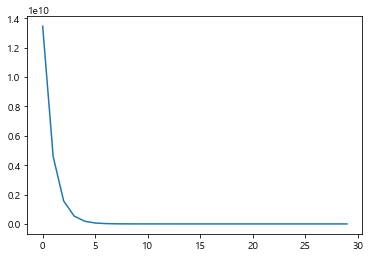

In [47]:
x_data = [1, 2, 3, 4, 5, 6, 7] #시간
y_data = [25000, 55000, 75000, 110000, 128000, 155000, 180000]

model = Sequential() 
model.add(Dense(1, input_shape=(1,)))  

model.compile(loss = "mse", optimizer=keras.optimizers.SGD(lr = 0.01))

# 딥러닝의 경우 레이어가 여러개 생기므로 한눈에 파악하기 위해 사용하는 것 summary
model.summary()


hist = model.fit(x_data, y_data, epochs = 30) 


print(model.get_weights())

print(hist.history["loss"])

plt.plot(hist.history["loss"]) 

print(model.predict([1]))
print(model.predict([8]))

#### 다중 선형 회귀

In [5]:
# 체중과 나이에 따른 혈당 
# 체중이 100이고 나이가 40일 때 혈당은 ?

np.random.seed(7)
data = np.genfromtxt("data/x09.txt", skip_header=36)
data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

In [6]:
x = np.array(data[:,2:4], dtype = np.float32)
y = np.array(data[:, -1], dtype=np.float32)

model = Sequential() 
model.add(Dense(1, input_shape=(2,)))  

model.compile(loss = "mse", optimizer=RMSprop(lr = 0.01))

# 딥러닝의 경우 레이어가 여러개 생기므로 한눈에 파악하기 위해 사용하는 것 summary
model.summary()


hist = model.fit(x, y, epochs = 3000) 




print(hist.history["loss"])

plt.plot(hist.history["loss"]) 

print(model.get_weights())
print(model.predict(np.array([[100, 40]])))
print(print(model.predict(np.array([[84, 46]]))))

NameError: name 'Sequential' is not defined

In [7]:
y

array([354., 190., 405., 263., 451., 302., 288., 385., 402., 365., 209.,
       290., 346., 254., 395., 434., 220., 374., 308., 220., 311., 181.,
       274., 303., 244.], dtype=float32)

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3000
5/5 [==============================] - 0s 64ms/step - loss: 27909.4492
Epoch 2/3000
5/5 [==============================] - 0s 399us/step - loss: 25250.9023
Epoch 3/3000
5/5 [==============================] - 0s 404us/step - loss: 23449.0117
Epoch 4/3000
5/5 [==============================] - 0s 199us/step - loss: 22013.2617
Epoch 5/3000
5/5 [==============================] - 0s 199us/step - loss: 20791.1914
Epoch 6/3000
5/5 [==============================] - 0s 195us/step - loss: 19712.7988
Epoch 7/3000
5/5 [==============================] - 0s 199us/step - loss: 18739.3652
Epoch 8/3000
5/5 [==============================] - 0s 399u

Epoch 93/3000
5/5 [==============================] - 0s 199us/step - loss: 3.0823
Epoch 94/3000
5/5 [==============================] - 0s 200us/step - loss: 3.0668
Epoch 95/3000
5/5 [==============================] - 0s 199us/step - loss: 3.0584
Epoch 96/3000
5/5 [==============================] - 0s 199us/step - loss: 3.0538
Epoch 97/3000
5/5 [==============================] - 0s 399us/step - loss: 3.0513
Epoch 98/3000
5/5 [==============================] - 0s 399us/step - loss: 3.0498
Epoch 99/3000
5/5 [==============================] - 0s 399us/step - loss: 3.0487
Epoch 100/3000
5/5 [==============================] - 0s 199us/step - loss: 3.0479
Epoch 101/3000
5/5 [==============================] - 0s 399us/step - loss: 3.0471
Epoch 102/3000
5/5 [==============================] - 0s 199us/step - loss: 3.0464
Epoch 103/3000
5/5 [==============================] - 0s 399us/step - loss: 3.0456
Epoch 104/3000
5/5 [==============================] - 0s 399us/step - loss: 3.0447
Epoch 105/3

Epoch 192/3000
5/5 [==============================] - 0s 399us/step - loss: 4.7449
Epoch 193/3000
5/5 [==============================] - 0s 199us/step - loss: 5.0381
Epoch 194/3000
5/5 [==============================] - 0s 399us/step - loss: 5.1559
Epoch 195/3000
5/5 [==============================] - 0s 199us/step - loss: 5.0593
Epoch 196/3000
5/5 [==============================] - 0s 200us/step - loss: 4.8173
Epoch 197/3000
5/5 [==============================] - 0s 199us/step - loss: 4.5380
Epoch 198/3000
5/5 [==============================] - 0s 200us/step - loss: 4.2980
Epoch 199/3000
5/5 [==============================] - 0s 200us/step - loss: 4.1287
Epoch 200/3000
5/5 [==============================] - 0s 199us/step - loss: 4.0346
Epoch 201/3000
5/5 [==============================] - 0s 199us/step - loss: 4.0109
Epoch 202/3000
5/5 [==============================] - 0s 199us/step - loss: 4.0515
Epoch 203/3000
5/5 [==============================] - 0s 200us/step - loss: 4.1494
Epoc

Epoch 291/3000
5/5 [==============================] - 0s 399us/step - loss: 4.1962
Epoch 292/3000
5/5 [==============================] - 0s 399us/step - loss: 4.1927
Epoch 293/3000
5/5 [==============================] - 0s 399us/step - loss: 4.1888
Epoch 294/3000
5/5 [==============================] - 0s 399us/step - loss: 4.1851
Epoch 295/3000
5/5 [==============================] - 0s 401us/step - loss: 4.1816
Epoch 296/3000
5/5 [==============================] - 0s 399us/step - loss: 4.1788
Epoch 297/3000
5/5 [==============================] - 0s 399us/step - loss: 4.1766
Epoch 298/3000
5/5 [==============================] - 0s 399us/step - loss: 4.1749
Epoch 299/3000
5/5 [==============================] - 0s 199us/step - loss: 4.1736
Epoch 300/3000
5/5 [==============================] - 0s 200us/step - loss: 4.1725
Epoch 301/3000
5/5 [==============================] - 0s 199us/step - loss: 4.1712
Epoch 302/3000
5/5 [==============================] - 0s 200us/step - loss: 4.1697
Epoc

Epoch 390/3000
5/5 [==============================] - 0s 200us/step - loss: 3.9875
Epoch 391/3000
5/5 [==============================] - 0s 200us/step - loss: 3.9856
Epoch 392/3000
5/5 [==============================] - 0s 399us/step - loss: 3.9837
Epoch 393/3000
5/5 [==============================] - 0s 399us/step - loss: 3.9818
Epoch 394/3000
5/5 [==============================] - 0s 399us/step - loss: 3.9799
Epoch 395/3000
5/5 [==============================] - 0s 199us/step - loss: 3.9780
Epoch 396/3000
5/5 [==============================] - 0s 399us/step - loss: 3.9762
Epoch 397/3000
5/5 [==============================] - 0s 399us/step - loss: 3.9743
Epoch 398/3000
5/5 [==============================] - 0s 199us/step - loss: 3.9724
Epoch 399/3000
5/5 [==============================] - 0s 199us/step - loss: 3.9705
Epoch 400/3000
5/5 [==============================] - 0s 199us/step - loss: 3.9686
Epoch 401/3000
5/5 [==============================] - 0s 200us/step - loss: 3.9667
Epoc

Epoch 489/3000
5/5 [==============================] - 0s 199us/step - loss: 3.8153
Epoch 490/3000
5/5 [==============================] - 0s 399us/step - loss: 3.8137
Epoch 491/3000
5/5 [==============================] - 0s 199us/step - loss: 3.8121
Epoch 492/3000
5/5 [==============================] - 0s 200us/step - loss: 3.8105
Epoch 493/3000
5/5 [==============================] - 0s 399us/step - loss: 3.8089
Epoch 494/3000
5/5 [==============================] - 0s 200us/step - loss: 3.8073
Epoch 495/3000
5/5 [==============================] - 0s 199us/step - loss: 3.8057
Epoch 496/3000
5/5 [==============================] - 0s 199us/step - loss: 3.8041
Epoch 497/3000
5/5 [==============================] - 0s 200us/step - loss: 3.8025
Epoch 498/3000
5/5 [==============================] - 0s 399us/step - loss: 3.8010
Epoch 499/3000
5/5 [==============================] - 0s 199us/step - loss: 3.7994
Epoch 500/3000
5/5 [==============================] - 0s 199us/step - loss: 3.7978
Epoc

Epoch 588/3000
5/5 [==============================] - 0s 399us/step - loss: 3.6698
Epoch 589/3000
5/5 [==============================] - 0s 399us/step - loss: 3.6684
Epoch 590/3000
5/5 [==============================] - 0s 399us/step - loss: 3.6670
Epoch 591/3000
5/5 [==============================] - 0s 199us/step - loss: 3.6657
Epoch 592/3000
5/5 [==============================] - 0s 399us/step - loss: 3.6643
Epoch 593/3000
5/5 [==============================] - 0s 399us/step - loss: 3.6630
Epoch 594/3000
5/5 [==============================] - 0s 200us/step - loss: 3.6617
Epoch 595/3000
5/5 [==============================] - 0s 199us/step - loss: 3.6603
Epoch 596/3000
5/5 [==============================] - 0s 199us/step - loss: 3.6589
Epoch 597/3000
5/5 [==============================] - 0s 199us/step - loss: 3.6575
Epoch 598/3000
5/5 [==============================] - 0s 200us/step - loss: 3.6562
Epoch 599/3000
5/5 [==============================] - 0s 199us/step - loss: 3.6550
Epoc

Epoch 687/3000
5/5 [==============================] - 0s 399us/step - loss: 3.5458
Epoch 688/3000
5/5 [==============================] - 0s 399us/step - loss: 3.5446
Epoch 689/3000
5/5 [==============================] - 0s 199us/step - loss: 3.5435
Epoch 690/3000
5/5 [==============================] - 0s 399us/step - loss: 3.5423
Epoch 691/3000
5/5 [==============================] - 0s 199us/step - loss: 3.5411
Epoch 692/3000
5/5 [==============================] - 0s 199us/step - loss: 3.5399
Epoch 693/3000
5/5 [==============================] - 0s 200us/step - loss: 3.5387
Epoch 694/3000
5/5 [==============================] - 0s 599us/step - loss: 3.5376
Epoch 695/3000
5/5 [==============================] - 0s 200us/step - loss: 3.5365
Epoch 696/3000
5/5 [==============================] - 0s 199us/step - loss: 3.5354
Epoch 697/3000
5/5 [==============================] - 0s 399us/step - loss: 3.5342
Epoch 698/3000
5/5 [==============================] - 0s 200us/step - loss: 3.5331
Epoc

Epoch 786/3000
5/5 [==============================] - 0s 199us/step - loss: 3.4392
Epoch 787/3000
5/5 [==============================] - 0s 200us/step - loss: 3.4381
Epoch 788/3000
5/5 [==============================] - 0s 199us/step - loss: 3.4371
Epoch 789/3000
5/5 [==============================] - 0s 200us/step - loss: 3.4361
Epoch 790/3000
5/5 [==============================] - 0s 200us/step - loss: 3.4351
Epoch 791/3000
5/5 [==============================] - 0s 199us/step - loss: 3.4341
Epoch 792/3000
5/5 [==============================] - 0s 200us/step - loss: 3.4332
Epoch 793/3000
5/5 [==============================] - 0s 399us/step - loss: 3.4322
Epoch 794/3000
5/5 [==============================] - 0s 200us/step - loss: 3.4313
Epoch 795/3000
5/5 [==============================] - 0s 199us/step - loss: 3.4303
Epoch 796/3000
5/5 [==============================] - 0s 399us/step - loss: 3.4294
Epoch 797/3000
5/5 [==============================] - 0s 199us/step - loss: 3.4284
Epoc

Epoch 885/3000
5/5 [==============================] - 0s 194us/step - loss: 3.3468
Epoch 886/3000
5/5 [==============================] - 0s 200us/step - loss: 3.3460
Epoch 887/3000
5/5 [==============================] - 0s 205us/step - loss: 3.3451
Epoch 888/3000
5/5 [==============================] - 0s 199us/step - loss: 3.3442
Epoch 889/3000
5/5 [==============================] - 0s 399us/step - loss: 3.3433
Epoch 890/3000
5/5 [==============================] - 0s 399us/step - loss: 3.3424
Epoch 891/3000
5/5 [==============================] - 0s 399us/step - loss: 3.3414
Epoch 892/3000
5/5 [==============================] - 0s 399us/step - loss: 3.3405
Epoch 893/3000
5/5 [==============================] - 0s 205us/step - loss: 3.3397
Epoch 894/3000
5/5 [==============================] - 0s 399us/step - loss: 3.3388
Epoch 895/3000
5/5 [==============================] - 0s 399us/step - loss: 3.3380
Epoch 896/3000
5/5 [==============================] - 0s 399us/step - loss: 3.3372
Epoc

Epoch 984/3000
5/5 [==============================] - 0s 399us/step - loss: 3.2658
Epoch 985/3000
5/5 [==============================] - 0s 199us/step - loss: 3.2651
Epoch 986/3000
5/5 [==============================] - 0s 200us/step - loss: 3.2643
Epoch 987/3000
5/5 [==============================] - 0s 399us/step - loss: 3.2635
Epoch 988/3000
5/5 [==============================] - 0s 399us/step - loss: 3.2627
Epoch 989/3000
5/5 [==============================] - 0s 200us/step - loss: 3.2619
Epoch 990/3000
5/5 [==============================] - 0s 399us/step - loss: 3.2610
Epoch 991/3000
5/5 [==============================] - 0s 199us/step - loss: 3.2603
Epoch 992/3000
5/5 [==============================] - 0s 199us/step - loss: 3.2595
Epoch 993/3000
5/5 [==============================] - 0s 199us/step - loss: 3.2588
Epoch 994/3000
5/5 [==============================] - 0s 399us/step - loss: 3.2581
Epoch 995/3000
5/5 [==============================] - 0s 399us/step - loss: 3.2574
Epoc

Epoch 1082/3000
5/5 [==============================] - 0s 399us/step - loss: 3.1948
Epoch 1083/3000
5/5 [==============================] - 0s 399us/step - loss: 3.1941
Epoch 1084/3000
5/5 [==============================] - 0s 205us/step - loss: 3.1934
Epoch 1085/3000
5/5 [==============================] - 0s 199us/step - loss: 3.1928
Epoch 1086/3000
5/5 [==============================] - 0s 399us/step - loss: 3.1921
Epoch 1087/3000
5/5 [==============================] - 0s 200us/step - loss: 3.1915
Epoch 1088/3000
5/5 [==============================] - 0s 200us/step - loss: 3.1908
Epoch 1089/3000
5/5 [==============================] - 0s 200us/step - loss: 3.1901
Epoch 1090/3000
5/5 [==============================] - 0s 199us/step - loss: 3.1895
Epoch 1091/3000
5/5 [==============================] - 0s 399us/step - loss: 3.1889
Epoch 1092/3000
5/5 [==============================] - 0s 200us/step - loss: 3.1882
Epoch 1093/3000
5/5 [==============================] - 0s 205us/step - loss:

Epoch 1180/3000
5/5 [==============================] - 0s 194us/step - loss: 3.1317
Epoch 1181/3000
5/5 [==============================] - 0s 399us/step - loss: 3.1311
Epoch 1182/3000
5/5 [==============================] - 0s 199us/step - loss: 3.1304
Epoch 1183/3000
5/5 [==============================] - 0s 399us/step - loss: 3.1298
Epoch 1184/3000
5/5 [==============================] - 0s 199us/step - loss: 3.1291
Epoch 1185/3000
5/5 [==============================] - 0s 205us/step - loss: 3.1285
Epoch 1186/3000
5/5 [==============================] - 0s 199us/step - loss: 3.1279
Epoch 1187/3000
5/5 [==============================] - 0s 399us/step - loss: 3.1273
Epoch 1188/3000
5/5 [==============================] - 0s 194us/step - loss: 3.1267
Epoch 1189/3000
5/5 [==============================] - 0s 199us/step - loss: 3.1261
Epoch 1190/3000
5/5 [==============================] - 0s 399us/step - loss: 3.1256
Epoch 1191/3000
5/5 [==============================] - 0s 199us/step - loss:

Epoch 1278/3000
5/5 [==============================] - 0s 399us/step - loss: 3.0746
Epoch 1279/3000
5/5 [==============================] - 0s 205us/step - loss: 3.0741
Epoch 1280/3000
5/5 [==============================] - 0s 194us/step - loss: 3.0735
Epoch 1281/3000
5/5 [==============================] - 0s 199us/step - loss: 3.0729
Epoch 1282/3000
5/5 [==============================] - 0s 200us/step - loss: 3.0723
Epoch 1283/3000
5/5 [==============================] - 0s 394us/step - loss: 3.0718
Epoch 1284/3000
5/5 [==============================] - 0s 599us/step - loss: 3.0712
Epoch 1285/3000
5/5 [==============================] - 0s 199us/step - loss: 3.0708
Epoch 1286/3000
5/5 [==============================] - 0s 200us/step - loss: 3.0702
Epoch 1287/3000
5/5 [==============================] - 0s 198us/step - loss: 3.0697
Epoch 1288/3000
5/5 [==============================] - 0s 399us/step - loss: 3.0692
Epoch 1289/3000
5/5 [==============================] - 0s 205us/step - loss:

Epoch 1376/3000
5/5 [==============================] - 0s 404us/step - loss: 3.0229
Epoch 1377/3000
5/5 [==============================] - 0s 199us/step - loss: 3.0224
Epoch 1378/3000
5/5 [==============================] - 0s 195us/step - loss: 3.0219
Epoch 1379/3000
5/5 [==============================] - 0s 200us/step - loss: 3.0213
Epoch 1380/3000
5/5 [==============================] - 0s 200us/step - loss: 3.0208
Epoch 1381/3000
5/5 [==============================] - 0s 399us/step - loss: 3.0203
Epoch 1382/3000
5/5 [==============================] - 0s 399us/step - loss: 3.0198
Epoch 1383/3000
5/5 [==============================] - 0s 399us/step - loss: 3.0193
Epoch 1384/3000
5/5 [==============================] - 0s 199us/step - loss: 3.0189
Epoch 1385/3000
5/5 [==============================] - 0s 199us/step - loss: 3.0184
Epoch 1386/3000
5/5 [==============================] - 0s 195us/step - loss: 3.0180
Epoch 1387/3000
5/5 [==============================] - 0s 200us/step - loss:

Epoch 1474/3000
5/5 [==============================] - 0s 199us/step - loss: 2.9757
Epoch 1475/3000
5/5 [==============================] - 0s 199us/step - loss: 2.9752
Epoch 1476/3000
5/5 [==============================] - 0s 200us/step - loss: 2.9747
Epoch 1477/3000
5/5 [==============================] - 0s 199us/step - loss: 2.9742
Epoch 1478/3000
5/5 [==============================] - 0s 199us/step - loss: 2.9738
Epoch 1479/3000
5/5 [==============================] - 0s 200us/step - loss: 2.9734
Epoch 1480/3000
5/5 [==============================] - 0s 200us/step - loss: 2.9729
Epoch 1481/3000
5/5 [==============================] - 0s 199us/step - loss: 2.9724
Epoch 1482/3000
5/5 [==============================] - 0s 199us/step - loss: 2.9720
Epoch 1483/3000
5/5 [==============================] - 0s 399us/step - loss: 2.9714
Epoch 1484/3000
5/5 [==============================] - 0s 199us/step - loss: 2.9710
Epoch 1485/3000
5/5 [==============================] - 0s 199us/step - loss:

Epoch 1572/3000
5/5 [==============================] - 0s 399us/step - loss: 2.9322
Epoch 1573/3000
5/5 [==============================] - 0s 399us/step - loss: 2.9317
Epoch 1574/3000
5/5 [==============================] - 0s 199us/step - loss: 2.9312
Epoch 1575/3000
5/5 [==============================] - 0s 200us/step - loss: 2.9307
Epoch 1576/3000
5/5 [==============================] - 0s 199us/step - loss: 2.9303
Epoch 1577/3000
5/5 [==============================] - 0s 200us/step - loss: 2.9298
Epoch 1578/3000
5/5 [==============================] - 0s 399us/step - loss: 2.9294
Epoch 1579/3000
5/5 [==============================] - 0s 200us/step - loss: 2.9290
Epoch 1580/3000
5/5 [==============================] - 0s 199us/step - loss: 2.9286
Epoch 1581/3000
5/5 [==============================] - 0s 200us/step - loss: 2.9282
Epoch 1582/3000
5/5 [==============================] - 0s 199us/step - loss: 2.9278
Epoch 1583/3000
5/5 [==============================] - 0s 200us/step - loss:

Epoch 1670/3000
5/5 [==============================] - 0s 200us/step - loss: 2.8917
Epoch 1671/3000
5/5 [==============================] - 0s 399us/step - loss: 2.8913
Epoch 1672/3000
5/5 [==============================] - 0s 200us/step - loss: 2.8909
Epoch 1673/3000
5/5 [==============================] - 0s 200us/step - loss: 2.8905
Epoch 1674/3000
5/5 [==============================] - 0s 199us/step - loss: 2.8901
Epoch 1675/3000
5/5 [==============================] - 0s 399us/step - loss: 2.8897
Epoch 1676/3000
5/5 [==============================] - 0s 199us/step - loss: 2.8894
Epoch 1677/3000
5/5 [==============================] - 0s 200us/step - loss: 2.8890
Epoch 1678/3000
5/5 [==============================] - 0s 199us/step - loss: 2.8886
Epoch 1679/3000
5/5 [==============================] - 0s 200us/step - loss: 2.8882
Epoch 1680/3000
5/5 [==============================] - 0s 199us/step - loss: 2.8877
Epoch 1681/3000
5/5 [==============================] - 0s 200us/step - loss:

Epoch 1768/3000
5/5 [==============================] - 0s 200us/step - loss: 2.8540
Epoch 1769/3000
5/5 [==============================] - 0s 394us/step - loss: 2.8536
Epoch 1770/3000
5/5 [==============================] - 0s 199us/step - loss: 2.8534
Epoch 1771/3000
5/5 [==============================] - 0s 399us/step - loss: 2.8531
Epoch 1772/3000
5/5 [==============================] - 0s 199us/step - loss: 2.8527
Epoch 1773/3000
5/5 [==============================] - 0s 199us/step - loss: 2.8523
Epoch 1774/3000
5/5 [==============================] - 0s 199us/step - loss: 2.8519
Epoch 1775/3000
5/5 [==============================] - 0s 199us/step - loss: 2.8515
Epoch 1776/3000
5/5 [==============================] - 0s 205us/step - loss: 2.8511
Epoch 1777/3000
5/5 [==============================] - 0s 399us/step - loss: 2.8508
Epoch 1778/3000
5/5 [==============================] - 0s 399us/step - loss: 2.8504
Epoch 1779/3000
5/5 [==============================] - 0s 399us/step - loss:

Epoch 1866/3000
5/5 [==============================] - 0s 402us/step - loss: 2.8190
Epoch 1867/3000
5/5 [==============================] - 0s 199us/step - loss: 2.8187
Epoch 1868/3000
5/5 [==============================] - 0s 399us/step - loss: 2.8183
Epoch 1869/3000
5/5 [==============================] - 0s 399us/step - loss: 2.8179
Epoch 1870/3000
5/5 [==============================] - 0s 399us/step - loss: 2.8175
Epoch 1871/3000
5/5 [==============================] - 0s 199us/step - loss: 2.8171
Epoch 1872/3000
5/5 [==============================] - 0s 200us/step - loss: 2.8168
Epoch 1873/3000
5/5 [==============================] - 0s 200us/step - loss: 2.8164
Epoch 1874/3000
5/5 [==============================] - 0s 200us/step - loss: 2.8161
Epoch 1875/3000
5/5 [==============================] - 0s 399us/step - loss: 2.8157
Epoch 1876/3000
5/5 [==============================] - 0s 200us/step - loss: 2.8154
Epoch 1877/3000
5/5 [==============================] - 0s 194us/step - loss:

Epoch 1964/3000
5/5 [==============================] - 0s 399us/step - loss: 2.7858
Epoch 1965/3000
5/5 [==============================] - 0s 598us/step - loss: 2.7855
Epoch 1966/3000
5/5 [==============================] - 0s 199us/step - loss: 2.7852
Epoch 1967/3000
5/5 [==============================] - 0s 399us/step - loss: 2.7848
Epoch 1968/3000
5/5 [==============================] - 0s 399us/step - loss: 2.7846
Epoch 1969/3000
5/5 [==============================] - 0s 407us/step - loss: 2.7843
Epoch 1970/3000
5/5 [==============================] - 0s 399us/step - loss: 2.7839
Epoch 1971/3000
5/5 [==============================] - 0s 199us/step - loss: 2.7836
Epoch 1972/3000
5/5 [==============================] - 0s 399us/step - loss: 2.7832
Epoch 1973/3000
5/5 [==============================] - 0s 399us/step - loss: 2.7830
Epoch 1974/3000
5/5 [==============================] - 0s 199us/step - loss: 2.7827
Epoch 1975/3000
5/5 [==============================] - 0s 199us/step - loss:

Epoch 2062/3000
5/5 [==============================] - 0s 199us/step - loss: 2.7546
Epoch 2063/3000
5/5 [==============================] - 0s 204us/step - loss: 2.7543
Epoch 2064/3000
5/5 [==============================] - 0s 194us/step - loss: 2.7539
Epoch 2065/3000
5/5 [==============================] - 0s 200us/step - loss: 2.7537
Epoch 2066/3000
5/5 [==============================] - 0s 200us/step - loss: 2.7534
Epoch 2067/3000
5/5 [==============================] - 0s 200us/step - loss: 2.7531
Epoch 2068/3000
5/5 [==============================] - 0s 197us/step - loss: 2.7528
Epoch 2069/3000
5/5 [==============================] - 0s 197us/step - loss: 2.7525
Epoch 2070/3000
5/5 [==============================] - 0s 199us/step - loss: 2.7522
Epoch 2071/3000
5/5 [==============================] - 0s 488us/step - loss: 2.7519
Epoch 2072/3000
5/5 [==============================] - 0s 203us/step - loss: 2.7516
Epoch 2073/3000
5/5 [==============================] - 0s 200us/step - loss:

Epoch 2160/3000
5/5 [==============================] - 0s 399us/step - loss: 2.7251
Epoch 2161/3000
5/5 [==============================] - 0s 203us/step - loss: 2.7248
Epoch 2162/3000
5/5 [==============================] - 0s 196us/step - loss: 2.7245
Epoch 2163/3000
5/5 [==============================] - 0s 198us/step - loss: 2.7242
Epoch 2164/3000
5/5 [==============================] - 0s 399us/step - loss: 2.7239
Epoch 2165/3000
5/5 [==============================] - 0s 199us/step - loss: 2.7236
Epoch 2166/3000
5/5 [==============================] - 0s 404us/step - loss: 2.7233
Epoch 2167/3000
5/5 [==============================] - 0s 394us/step - loss: 2.7230
Epoch 2168/3000
5/5 [==============================] - 0s 199us/step - loss: 2.7227
Epoch 2169/3000
5/5 [==============================] - 0s 204us/step - loss: 2.7224
Epoch 2170/3000
5/5 [==============================] - 0s 399us/step - loss: 2.7222
Epoch 2171/3000
5/5 [==============================] - 0s 194us/step - loss:

Epoch 2258/3000
5/5 [==============================] - 0s 399us/step - loss: 2.6969
Epoch 2259/3000
5/5 [==============================] - 0s 207us/step - loss: 2.6966
Epoch 2260/3000
5/5 [==============================] - 0s 200us/step - loss: 2.6963
Epoch 2261/3000
5/5 [==============================] - 0s 203us/step - loss: 2.6960
Epoch 2262/3000
5/5 [==============================] - 0s 199us/step - loss: 2.6958
Epoch 2263/3000
5/5 [==============================] - 0s 200us/step - loss: 2.6956
Epoch 2264/3000
5/5 [==============================] - 0s 200us/step - loss: 2.6953
Epoch 2265/3000
5/5 [==============================] - 0s 200us/step - loss: 2.6951
Epoch 2266/3000
5/5 [==============================] - 0s 197us/step - loss: 2.6949
Epoch 2267/3000
5/5 [==============================] - 0s 194us/step - loss: 2.6947
Epoch 2268/3000
5/5 [==============================] - 0s 399us/step - loss: 2.6944
Epoch 2269/3000
5/5 [==============================] - 0s 205us/step - loss:

Epoch 2356/3000
5/5 [==============================] - 0s 200us/step - loss: 2.6704
Epoch 2357/3000
5/5 [==============================] - 0s 199us/step - loss: 2.6701
Epoch 2358/3000
5/5 [==============================] - 0s 200us/step - loss: 2.6698
Epoch 2359/3000
5/5 [==============================] - 0s 200us/step - loss: 2.6695
Epoch 2360/3000
5/5 [==============================] - 0s 399us/step - loss: 2.6692
Epoch 2361/3000
5/5 [==============================] - 0s 399us/step - loss: 2.6689
Epoch 2362/3000
5/5 [==============================] - 0s 399us/step - loss: 2.6687
Epoch 2363/3000
5/5 [==============================] - 0s 199us/step - loss: 2.6684
Epoch 2364/3000
5/5 [==============================] - 0s 199us/step - loss: 2.6682
Epoch 2365/3000
5/5 [==============================] - 0s 199us/step - loss: 2.6679
Epoch 2366/3000
5/5 [==============================] - 0s 199us/step - loss: 2.6677
Epoch 2367/3000
5/5 [==============================] - 0s 399us/step - loss:

Epoch 2454/3000
5/5 [==============================] - 0s 399us/step - loss: 2.6448
Epoch 2455/3000
5/5 [==============================] - 0s 399us/step - loss: 2.6446
Epoch 2456/3000
5/5 [==============================] - 0s 199us/step - loss: 2.6444
Epoch 2457/3000
5/5 [==============================] - 0s 200us/step - loss: 2.6441
Epoch 2458/3000
5/5 [==============================] - 0s 200us/step - loss: 2.6440
Epoch 2459/3000
5/5 [==============================] - 0s 399us/step - loss: 2.6438
Epoch 2460/3000
5/5 [==============================] - 0s 199us/step - loss: 2.6435
Epoch 2461/3000
5/5 [==============================] - 0s 199us/step - loss: 2.6432
Epoch 2462/3000
5/5 [==============================] - 0s 199us/step - loss: 2.6428
Epoch 2463/3000
5/5 [==============================] - 0s 399us/step - loss: 2.6425
Epoch 2464/3000
5/5 [==============================] - 0s 199us/step - loss: 2.6422
Epoch 2465/3000
5/5 [==============================] - 0s 199us/step - loss:

Epoch 2552/3000
5/5 [==============================] - 0s 200us/step - loss: 2.6205
Epoch 2553/3000
5/5 [==============================] - 0s 199us/step - loss: 2.6202
Epoch 2554/3000
5/5 [==============================] - 0s 199us/step - loss: 2.6200
Epoch 2555/3000
5/5 [==============================] - 0s 199us/step - loss: 2.6198
Epoch 2556/3000
5/5 [==============================] - 0s 200us/step - loss: 2.6196
Epoch 2557/3000
5/5 [==============================] - 0s 399us/step - loss: 2.6193
Epoch 2558/3000
5/5 [==============================] - 0s 399us/step - loss: 2.6191
Epoch 2559/3000
5/5 [==============================] - 0s 199us/step - loss: 2.6188
Epoch 2560/3000
5/5 [==============================] - 0s 199us/step - loss: 2.6186
Epoch 2561/3000
5/5 [==============================] - 0s 200us/step - loss: 2.6184
Epoch 2562/3000
5/5 [==============================] - 0s 200us/step - loss: 2.6181
Epoch 2563/3000
5/5 [==============================] - 0s 398us/step - loss:

Epoch 2650/3000
5/5 [==============================] - 0s 199us/step - loss: 2.5974
Epoch 2651/3000
5/5 [==============================] - 0s 399us/step - loss: 2.5972
Epoch 2652/3000
5/5 [==============================] - 0s 199us/step - loss: 2.5970
Epoch 2653/3000
5/5 [==============================] - 0s 199us/step - loss: 2.5967
Epoch 2654/3000
5/5 [==============================] - 0s 200us/step - loss: 2.5964
Epoch 2655/3000
5/5 [==============================] - 0s 199us/step - loss: 2.5961
Epoch 2656/3000
5/5 [==============================] - 0s 200us/step - loss: 2.5959
Epoch 2657/3000
5/5 [==============================] - 0s 199us/step - loss: 2.5956
Epoch 2658/3000
5/5 [==============================] - 0s 199us/step - loss: 2.5954
Epoch 2659/3000
5/5 [==============================] - 0s 399us/step - loss: 2.5952
Epoch 2660/3000
5/5 [==============================] - 0s 200us/step - loss: 2.5949
Epoch 2661/3000
5/5 [==============================] - 0s 199us/step - loss:

Epoch 2748/3000
5/5 [==============================] - 0s 200us/step - loss: 2.5751
Epoch 2749/3000
5/5 [==============================] - 0s 199us/step - loss: 2.5750
Epoch 2750/3000
5/5 [==============================] - 0s 200us/step - loss: 2.5747
Epoch 2751/3000
5/5 [==============================] - 0s 199us/step - loss: 2.5745
Epoch 2752/3000
5/5 [==============================] - 0s 399us/step - loss: 2.5742
Epoch 2753/3000
5/5 [==============================] - 0s 199us/step - loss: 2.5739
Epoch 2754/3000
5/5 [==============================] - 0s 200us/step - loss: 2.5736
Epoch 2755/3000
5/5 [==============================] - 0s 399us/step - loss: 2.5734
Epoch 2756/3000
5/5 [==============================] - 0s 399us/step - loss: 2.5732
Epoch 2757/3000
5/5 [==============================] - 0s 189us/step - loss: 2.5730
Epoch 2758/3000
5/5 [==============================] - 0s 598us/step - loss: 2.5728
Epoch 2759/3000
5/5 [==============================] - 0s 399us/step - loss:

Epoch 2846/3000
5/5 [==============================] - 0s 399us/step - loss: 2.5538
Epoch 2847/3000
5/5 [==============================] - 0s 199us/step - loss: 2.5536
Epoch 2848/3000
5/5 [==============================] - 0s 200us/step - loss: 2.5533
Epoch 2849/3000
5/5 [==============================] - 0s 399us/step - loss: 2.5530
Epoch 2850/3000
5/5 [==============================] - 0s 399us/step - loss: 2.5528
Epoch 2851/3000
5/5 [==============================] - 0s 199us/step - loss: 2.5526
Epoch 2852/3000
5/5 [==============================] - 0s 399us/step - loss: 2.5524
Epoch 2853/3000
5/5 [==============================] - 0s 199us/step - loss: 2.5522
Epoch 2854/3000
5/5 [==============================] - 0s 200us/step - loss: 2.5520
Epoch 2855/3000
5/5 [==============================] - 0s 399us/step - loss: 2.5518
Epoch 2856/3000
5/5 [==============================] - 0s 399us/step - loss: 2.5516
Epoch 2857/3000
5/5 [==============================] - 0s 399us/step - loss:

Epoch 2944/3000
5/5 [==============================] - 0s 199us/step - loss: 2.5332
Epoch 2945/3000
5/5 [==============================] - 0s 200us/step - loss: 2.5331
Epoch 2946/3000
5/5 [==============================] - 0s 200us/step - loss: 2.5330
Epoch 2947/3000
5/5 [==============================] - 0s 199us/step - loss: 2.5328
Epoch 2948/3000
5/5 [==============================] - 0s 199us/step - loss: 2.5326
Epoch 2949/3000
5/5 [==============================] - 0s 399us/step - loss: 2.5323
Epoch 2950/3000
5/5 [==============================] - 0s 399us/step - loss: 2.5321
Epoch 2951/3000
5/5 [==============================] - 0s 399us/step - loss: 2.5318
Epoch 2952/3000
5/5 [==============================] - 0s 399us/step - loss: 2.5316
Epoch 2953/3000
5/5 [==============================] - 0s 199us/step - loss: 2.5313
Epoch 2954/3000
5/5 [==============================] - 0s 200us/step - loss: 2.5311
Epoch 2955/3000
5/5 [==============================] - 0s 199us/step - loss:

[array([[ 1.5486957],
       [ 0.7614508],
       [-0.2559465]], dtype=float32), array([-1.4922539], dtype=float32)]
---------------------------------------------------
[[153.28262]
 [185.7411 ]
 [182.59851]
 [196.21007]
 [143.90204]]


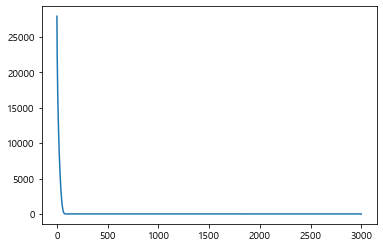

In [86]:
x_data = [[73., 80., 75.], 
          [93., 88., 93.],
          [89., 91., 90.], 
          [96., 98., 100.], 
          [73., 66., 70.]]
y_data = [[152.], 
          [185.], 
          [180.], 
          [196.], 
          [142.]]

x_data = np.array(x_data, dtype = np.float32)
y_data = np.array(y_data, dtype = np.float32)

model = Sequential() 
model.add(Dense(1, input_shape=(3,)))  

model.compile(loss = "mse", optimizer=RMSprop(lr = 0.01))

model.summary()


hist = model.fit(x_data, y_data, epochs = 3000) 




print(hist.history["loss"])
plt.plot(hist.history["loss"]) 
print(model.get_weights())
print("---------------------------------------------------")
#print(model.predict(np.array([[73, 80, 75]])))
#print(model.predict(np.array([[93., 88., 93.]])))
#print(model.predict(np.array([[89., 91., 90.]])))
#print(model.predict(np.array([[96., 98., 100.]])))
#print(model.predict(np.array([[73., 66., 70.]])))
print(model.predict(x_data))

#### 주택 가격을 사용한 회귀 분석

In [88]:
from keras.datasets import boston_housing
(train_data, train_target), (test_data, test_target) = boston_housing.load_data()

57344/57026 [==============================] - 0s 4us/step


In [94]:
print(train_data.shape, test_data.shape)
print(train_target[0:10])

(404, 13) (102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


In [106]:
# 정규화 
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std 

test_data -= mean
test_data /= std

In [107]:
# 3개의 레이어로 구성 : 입출력 갯수는 64개
model = Sequential() 
model.add(Dense(64, input_shape=(13,), activation="relu"))   # 13 은 train_data_shape[1] 로 변경 가능 
model.add(Dense(64, activation="relu"))  # 히든레이어는 몇개를 입력받을지(input_shape)를 쓸 필요가 없다.
model.add(Dense(1)) # 여러개의 레이어를 구성할때에는 출력 계층도 input_shape를 쓸 필요가 없다. 

model.summary()

model.compile(loss = "mean_squared_error", optimizer="rmsprop", metrics=["mae"]) #maetrics 어떤값으로 측정할 것인가? 


hist = model.fit(train_data, train_target, epochs = 100, batch_size = 1, verbose=1 ) 
# batch_size=1 은 전체
# verbose 출력할때 결과를 자세하게 보여줄 것인지 생략할 것인지

mse, mae = model.evaluate(test_data, test_target)
print(mse, mae)
# loss: 17.5133 - mae: 2.9062 / 테스트 : 27.07262525371477 3.6275432109832764
# 정규화 했을 때 : loss: 3.7990 - mae: 1.3343 / 테스트 : 17.661653855267694 2.727792978286743



#print(hist.history["loss"])
#plt.plot(hist.history["loss"]) 
#print(model.predict(test_data))

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_88 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_89 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
404/404 [==============================] - 1s 1ms/step - loss: 156.3884 - mae: 8.8730
Epoch 2/100
404/404 [==============================] - 0s 916us/step - loss: 23.4788 - mae: 3.2274
Epoch 3/100
404/404 [==============================] - 0s 900us/step - loss: 17.8428 - mae: 2.8939
Epoch 4/100
404/404 [==============================] - 0s 891us/step - loss: 14.9546 

#### 로지스틱 회귀 

Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 32)                96        
_________________________________________________________________
dense_113 (Dense)            (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
6/6 [==============================] - 0s 48ms/step - loss: 0.3220 - binary_accuracy: 0.5000
Epoch 2/500
6/6 [==============================] - 0s 167us/step - loss: 0.2246 - binary_accuracy: 0.6667
Epoch 3/500
6/6 [==============================] - 0s 329us/step - loss: 0.1909 - binary_accuracy: 0.8333
Epoch 4/500
6/6 [==============================] - 0s 333us/step - loss: 0.1750 - binary_accuracy: 0.8333
Epoch 5/500
6/6 [==============================] - 0s 329us/step - loss: 0.1650 - binary_accur

Epoch 72/500
6/6 [==============================] - 0s 333us/step - loss: 0.0163 - binary_accuracy: 1.0000
Epoch 73/500
6/6 [==============================] - 0s 166us/step - loss: 0.0152 - binary_accuracy: 1.0000
Epoch 74/500
6/6 [==============================] - 0s 168us/step - loss: 0.0150 - binary_accuracy: 1.0000
Epoch 75/500
6/6 [==============================] - 0s 328us/step - loss: 0.0138 - binary_accuracy: 1.0000
Epoch 76/500
6/6 [==============================] - 0s 328us/step - loss: 0.0137 - binary_accuracy: 1.0000
Epoch 77/500
6/6 [==============================] - 0s 332us/step - loss: 0.0127 - binary_accuracy: 1.0000
Epoch 78/500
6/6 [==============================] - 0s 337us/step - loss: 0.0124 - binary_accuracy: 1.0000
Epoch 79/500
6/6 [==============================] - 0s 328us/step - loss: 0.0115 - binary_accuracy: 1.0000
Epoch 80/500
6/6 [==============================] - 0s 329us/step - loss: 0.0114 - binary_accuracy: 1.0000
Epoch 81/500
6/6 [===================

Epoch 148/500
6/6 [==============================] - 0s 330us/step - loss: 4.7548e-04 - binary_accuracy: 1.0000
Epoch 149/500
6/6 [==============================] - 0s 332us/step - loss: 4.2720e-04 - binary_accuracy: 1.0000
Epoch 150/500
6/6 [==============================] - 0s 162us/step - loss: 4.1175e-04 - binary_accuracy: 1.0000
Epoch 151/500
6/6 [==============================] - 0s 162us/step - loss: 3.7837e-04 - binary_accuracy: 1.0000
Epoch 152/500
6/6 [==============================] - 0s 328us/step - loss: 3.7094e-04 - binary_accuracy: 1.0000
Epoch 153/500
6/6 [==============================] - 0s 330us/step - loss: 3.4079e-04 - binary_accuracy: 1.0000
Epoch 154/500
6/6 [==============================] - 0s 337us/step - loss: 3.2585e-04 - binary_accuracy: 1.0000
Epoch 155/500
6/6 [==============================] - 0s 329us/step - loss: 3.0612e-04 - binary_accuracy: 1.0000
Epoch 156/500
6/6 [==============================] - 0s 166us/step - loss: 2.9468e-04 - binary_accuracy:

Epoch 222/500
6/6 [==============================] - 0s 332us/step - loss: 1.0724e-05 - binary_accuracy: 1.0000
Epoch 223/500
6/6 [==============================] - 0s 332us/step - loss: 1.0123e-05 - binary_accuracy: 1.0000
Epoch 224/500
6/6 [==============================] - 0s 166us/step - loss: 9.7055e-06 - binary_accuracy: 1.0000
Epoch 225/500
6/6 [==============================] - 0s 332us/step - loss: 9.2045e-06 - binary_accuracy: 1.0000
Epoch 226/500
6/6 [==============================] - 0s 166us/step - loss: 8.7518e-06 - binary_accuracy: 1.0000
Epoch 227/500
6/6 [==============================] - 0s 332us/step - loss: 8.3644e-06 - binary_accuracy: 1.0000
Epoch 228/500
6/6 [==============================] - 0s 166us/step - loss: 7.9052e-06 - binary_accuracy: 1.0000
Epoch 229/500
6/6 [==============================] - 0s 333us/step - loss: 7.5995e-06 - binary_accuracy: 1.0000
Epoch 230/500
6/6 [==============================] - 0s 332us/step - loss: 7.1785e-06 - binary_accuracy:

Epoch 296/500
6/6 [==============================] - 0s 166us/step - loss: 2.5839e-07 - binary_accuracy: 1.0000
Epoch 297/500
6/6 [==============================] - 0s 166us/step - loss: 2.4882e-07 - binary_accuracy: 1.0000
Epoch 298/500
6/6 [==============================] - 0s 332us/step - loss: 2.3737e-07 - binary_accuracy: 1.0000
Epoch 299/500
6/6 [==============================] - 0s 332us/step - loss: 2.2991e-07 - binary_accuracy: 1.0000
Epoch 300/500
6/6 [==============================] - 0s 332us/step - loss: 2.1879e-07 - binary_accuracy: 1.0000
Epoch 301/500
6/6 [==============================] - 0s 332us/step - loss: 2.1197e-07 - binary_accuracy: 1.0000
Epoch 302/500
6/6 [==============================] - 0s 333us/step - loss: 2.0330e-07 - binary_accuracy: 1.0000
Epoch 303/500
6/6 [==============================] - 0s 166us/step - loss: 1.9368e-07 - binary_accuracy: 1.0000
Epoch 304/500
6/6 [==============================] - 0s 332us/step - loss: 1.8815e-07 - binary_accuracy:

Epoch 370/500
6/6 [==============================] - 0s 166us/step - loss: 1.7656e-08 - binary_accuracy: 1.0000
Epoch 371/500
6/6 [==============================] - 0s 328us/step - loss: 1.7620e-08 - binary_accuracy: 1.0000
Epoch 372/500
6/6 [==============================] - 0s 333us/step - loss: 1.6820e-08 - binary_accuracy: 1.0000
Epoch 373/500
6/6 [==============================] - 0s 337us/step - loss: 1.6616e-08 - binary_accuracy: 1.0000
Epoch 374/500
6/6 [==============================] - 0s 164us/step - loss: 1.5922e-08 - binary_accuracy: 1.0000
Epoch 375/500
6/6 [==============================] - 0s 166us/step - loss: 1.5489e-08 - binary_accuracy: 1.0000
Epoch 376/500
6/6 [==============================] - 0s 333us/step - loss: 1.5101e-08 - binary_accuracy: 1.0000
Epoch 377/500
6/6 [==============================] - 0s 166us/step - loss: 1.4785e-08 - binary_accuracy: 1.0000
Epoch 378/500
6/6 [==============================] - 0s 166us/step - loss: 1.4416e-08 - binary_accuracy:

Epoch 444/500
6/6 [==============================] - 0s 333us/step - loss: 5.4576e-09 - binary_accuracy: 1.0000
Epoch 445/500
6/6 [==============================] - 0s 327us/step - loss: 5.3914e-09 - binary_accuracy: 1.0000
Epoch 446/500
6/6 [==============================] - 0s 328us/step - loss: 5.3496e-09 - binary_accuracy: 1.0000
Epoch 447/500
6/6 [==============================] - 0s 166us/step - loss: 5.2878e-09 - binary_accuracy: 1.0000
Epoch 448/500
6/6 [==============================] - 0s 170us/step - loss: 5.2466e-09 - binary_accuracy: 1.0000
Epoch 449/500
6/6 [==============================] - 0s 170us/step - loss: 5.1860e-09 - binary_accuracy: 1.0000
Epoch 450/500
6/6 [==============================] - 0s 329us/step - loss: 5.1457e-09 - binary_accuracy: 1.0000
Epoch 451/500
6/6 [==============================] - 0s 166us/step - loss: 5.0898e-09 - binary_accuracy: 1.0000
Epoch 452/500
6/6 [==============================] - 0s 328us/step - loss: 5.0462e-09 - binary_accuracy:

[[8.0836180e-08]
 [5.0201139e-05]
 [1.0241747e-04]
 [9.9993861e-01]
 [9.9999857e-01]
 [9.9993765e-01]]


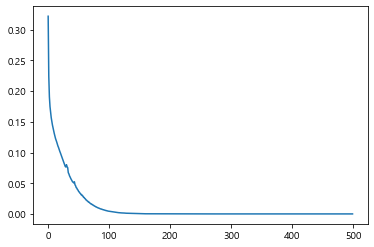

In [127]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0],[0],[0],[1],[1],[1]]
x_data = np.array(x_data)
y_data = np.array(y_data)


model = Sequential() 
model.add(Dense(32, input_dim=2, activation="relu")) #input_dim 차원의 수
model.add(Dense(1, activation="sigmoid"))
model.summary()

model.compile(loss = "mse", optimizer=RMSprop(lr = 0.01), metrics=["binary_accuracy"])
hist = model.fit(x_data,y_data, epochs = 500) 

cost, acc = model.evaluate(x_data, y_data) # evaluate 종합적으로 나온 결과값을 요약하여 보여주는 것
print(cost, acc)

print(hist.history["loss"])
plt.plot(hist.history["loss"]) 
print(model.predict(x_data))

#### MNIST 

##### 1. 첫번째 형태

In [2]:
 from keras.datasets import mnist  # 케라스는 튜플로 묶어서 던져준다 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape, X_test.shape)
print(y_train[0:10])

(60000, 28, 28) (10000, 28, 28)
[5 0 4 1 9 2 1 3 1 4]


In [4]:
# one - hot encoding
y_train = np_utils.to_categorical(y_train)`

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [5]:
# X_train과 X_test를 3차원에서 2차원으로
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

model = Sequential()

# 레이어 3개 / 
model.add(Dense(64, input_shape=(28*28,), activation = "relu")) # input_dim=28*28
# model.add(Dense(64, input_dim=28*28, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(10, activation= "softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics = ["accuracy"])  # 필요에 따라서 metrics는 리스트안에 더추가 가능
model.summary()
# SGD(lr = 0.001)

model.fit(X_train, y_train, epochs=15, batch_size= 32) #94~ 95% 의 정확도 


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________

Epoch 1/15
60000/60000 [==============================] - 2s 29us/step - loss: 1.5698 - accuracy: 0.8395
Epoch 2/15
60000/60000 [==============================] - 2s 26us/step - loss: 0.3436 - accuracy: 0.9130
Epoch 3/15
60000/60000 [==============================] - 2s 27us/step - loss: 0.2579 - 

In [6]:
result = model.evaluate(X_test, y_test, batch_size = 32)
print(result) # [0.16315336814736947, 0.960099995136261]

10000/10000 [==============================] - 0s 13us/step
[0.20703518233080975, 0.9574000239372253]


In [7]:
# 데이터 예측
xhat_idx = np.random.choice(X_test.shape[0], 10)
print(xhat_idx)

y_test[xhat_idx]

[4871 6806 9082 9384 3858 2265 2136 7895 7048  127]


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [8]:

# yhat = model.predict(X_test[xhat_idx])
yhat = model.predict_classes(X_test[xhat_idx])

for i in range(10):
    print("True :", np.argmax(y_test[xhat_idx[i]]), ", Predict : ", yhat[i])

True : 1 , Predict :  1
True : 8 , Predict :  8
True : 2 , Predict :  2
True : 7 , Predict :  7
True : 1 , Predict :  1
True : 4 , Predict :  4
True : 1 , Predict :  1
True : 9 , Predict :  9
True : 1 , Predict :  1
True : 5 , Predict :  5


##### 2. 두번째 형태 : 표준화 , k-fold cross validation

In [12]:
 from keras.datasets import mnist  
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train[0:10])

y_test = np_utils.to_categorical(y_test)
print(y_train[0:10])

# 표준화 
X_train = X_train.reshape(-1, 28*28).astype("float32") / 255 
X_test = X_test.reshape(-1, 28*28).astype("float32") / 255 

# validation 분할 (K-fold 방식)
# 전체 6만개를 12600개는 테스트용 나머지는 훈련용으로 나누기
x_val = X_train[:12600] # 테스트용
X_train = X_train[12600 :]
y_val = y_train[:12600]
y_train = y_train[12600:]

(60000, 28, 28) (10000, 28, 28)
[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [13]:
model = Sequential()

# 레이어 3개 / 
model.add(Dense(64, input_shape=(28*28,), activation = "relu")) # input_dim=28*28
# model.add(Dense(64, input_dim=28*28, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(10, activation= "softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics = ["accuracy"])  # 필요에 따라서 metrics는 리스트안에 더추가 가능
model.summary()
# SGD(lr = 0.001)

model.fit(X_train, y_train, epochs=15, batch_size= 32, validation_data = (x_val, y_val))
# loss: 0.0146 - accuracy: 0.9950 - val_loss: 0.1238 - val_accuracy: 0.9743

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Train on 47400 samples, validate on 12600 samples
Epoch 1/15
47400/47400 [==============================] - 2s 34us/step - loss: 0.3051 - accuracy: 0.9120 - val_loss: 0.1755 - val_accuracy: 0.9479
Epoch 2/15
47400/47400 [==============================] - 2s 32us/step - loss: 0.1326 - accuracy: 0.9607 - val_loss: 0.1353 - val_accuracy: 0.9590
Epoch 3/15
47400/47400 [============

In [14]:
result = model.evaluate(X_test, y_test, batch_size = 32)
print(result) # [0.12803626818847152, 0.974399983882904]

10000/10000 [==============================] - 0s 13us/step
[0.12803626818847152, 0.974399983882904]


##### 3.  세번째 형태 : 텐서보드, 모델 저장

In [ ]:
 from keras.datasets import mnist  
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train[0:10])

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(y_train[0:10])

# 표준화 
X_train = X_train.reshape(-1, 28*28).astype("float32") / 255 
X_test = X_test.reshape(-1, 28*28).astype("float32") / 255 

# validation 분할 (K-fold 방식)
# 전체 6만개를 12600개는 테스트용 나머지는 훈련용으로 나누기
x_val = X_train[:12600] # 테스트용
X_train = X_train[12600 :]
y_val = y_train[:12600]
y_train = y_train[12600:]

In [18]:
model = Sequential()

# 레이어 3개 / 
model.add(Dense(64, input_shape=(28*28,), activation = "relu")) # input_dim=28*28
# model.add(Dense(64, input_dim=28*28, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(10, activation= "softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics = ["accuracy"])  # 필요에 따라서 metrics는 리스트안에 더추가 가능
model.summary()
# SGD(lr = 0.001)

#텐서 보드 설정 (훈련시키기 전에 준비) : tensorboard --logdir=graph
tf_hist = keras.callbacks.TensorBoard(log_dir = "./graph", write_graph = True, write_images = True)
# callback() : 시스템이 필요할때 호출하는 함수들

model.fit(X_train, y_train, epochs=15, batch_size= 32, validation_data = (x_val, y_val), 
          callbacks=[tf_hist])

# 모델을 저장 
model.save("data/mnist_model.h5") # h5 : 케라스에서 지원하는 확장자  


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Train on 47400 samples, validate on 12600 samples


Epoch 1/15
47400/47400 [==============================] - 2s 38us/step - loss: 0.3135 - accuracy: 0.9082 - val_loss: 0.1737 - val_accuracy: 0.9481

Epoch 2/15
47400/47400 [==============================] - 2s 34us/step - loss: 0.1380 - accuracy: 0.9581 - val_loss: 0.1264 - val_accuracy: 0.9622
Epoch 3/15
47400/47400 [=========

In [20]:
result = model.evaluate(X_test, y_test, batch_size = 32)
print(result) # [0.12446773160760276, 0.9728000164031982]

10000/10000 [==============================] - 0s 15us/step
[0.12446773160760276, 0.9728000164031982]


In [19]:
# 모델 불러오기
model2 = load_model("data/mnist_model.h5")

In [21]:
result = model2.evaluate(X_test, y_test, batch_size = 32)
print(result) # [0.12446773160760276, 0.9728000164031982]

10000/10000 [==============================] - 0s 18us/step
[0.12446773160760276, 0.9728000164031982]


##### 4. 네 번째 형태 : 조기 종료(EarlyStopping)

- EarlyStopping(monitor="val_loss", min_data=0, patience=10) 기본값


+ monitor : 관찰하고자 하는 항목, 주로 val_loss나 val_acc가 사용됨
+ min_data : 개선되고 있다고 판단하기 위한 최소 변화량
+ patience : 지정된 값까지 기다렸다가 종료

In [22]:
from keras.datasets import mnist  
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train[0:10])

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(y_train[0:10])

# 표준화 
X_train = X_train.reshape(-1, 28*28).astype("float32") / 255 
X_test = X_test.reshape(-1, 28*28).astype("float32") / 255 

# validation 분할 (K-fold 방식)
# 전체 6만개를 12600개는 테스트용 나머지는 훈련용으로 나누기
x_val = X_train[:12600] # 테스트용
X_train = X_train[12600 :]
y_val = y_train[:12600]
y_train = y_train[12600:]

(60000, 28, 28) (10000, 28, 28)
[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [23]:
model = Sequential()

# 레이어 3개 / 
model.add(Dense(64, input_shape=(28*28,), activation = "relu")) # input_dim=28*28
# model.add(Dense(64, input_dim=28*28, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(10, activation= "softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics = ["accuracy"])  # 필요에 따라서 metrics는 리스트안에 더추가 가능
model.summary()
# SGD(lr = 0.001)

#텐서 보드 설정 (훈련시키기 전에 준비) : tensorboard --logdir=graph
tf_hist = keras.callbacks.TensorBoard(log_dir = "./graph", write_graph = True, write_images = True)

# 조기 종료 : 조기 종료 역시 callback 기능
early = EarlyStopping()

model.fit(X_train, y_train, epochs=30, batch_size= 32, validation_data = (x_val, y_val), 
          callbacks=[tf_hist, early])




Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_20 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_21 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Train on 47400 samples, validate on 12600 samples
Epoch 1/30
47400/47400 [==============================] - 2s 39us/step - loss: 0.3066 - accuracy: 0.9115 - val_loss: 0.1622 - val_accuracy: 0.9510
Epoch 2/30
47400/47400 [==============================] - 2s 37us/step - loss: 0.1378 - accuracy: 0.9597 - val_loss: 0.1227 - val_accuracy: 0.9624
Epoch 3/30
47400/47400 [============

##### 5. 다섯 번째 형태 :  함수화, dropout

In [102]:
def make_model(input_num, output_num, hidden_layer):
    model = Sequential()
    model.add(Dense(hidden_layer[0], input_shape = (input_num,), activation="relu"))
    for i in range(len(hidden_layer)-1) :
        model.add(Dense(hidden_layer[i],activation="relu"))
        
    model.add(keras.layers.core.Dropout(0.2))
    
    model.add(Dense(output_num, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])
    return model

In [87]:
def make_model(input_num, output_num, hidden_layer):
    model = Sequential()
    model.add(Dense(hidden_layer[0], input_shape = (input_num,), activation="relu", name = "hidden-1"))
    model.add(Dense(hidden_layer[1], activation="relu", name = "hidden-2"))
    model.add(Dense(hidden_layer[2], activation="relu", name = "hidden-3"))
    model.add(Dense(hidden_layer[3], activation="relu", name = "hidden-4"))
    
    model.add(keras.layers.core.Dropout(0.2))
    
    model.add(Dense(output_num, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])
    return model

In [88]:
from keras.datasets import mnist  
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train[0:10])

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(y_train[0:10])

# 표준화 
X_train = X_train.reshape(-1, 28*28).astype("float32") / 255 
X_test = X_test.reshape(-1, 28*28).astype("float32") / 255 

# 파라미터 
input_num = 784
output_num = 10
hidden_layer = [255, 255, 255, 255]
range(hidden_layer)
model = make_model(input_num, output_num, hidden_layer)
model.fit(X_train, y_train, epochs=5, batch_size =100)

(60000, 28, 28) (10000, 28, 28)
[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Epoch 1/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.2497 - accuracy: 0.9245
Epoch 2/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.0997 - accuracy: 0.9702
Epoch 3/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.0684 - accuracy: 0.9788
Epoch 4/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.0538 - accuracy: 0.9832
Epoch 5/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.0423 - accuracy: 0.9866


In [89]:
perform = model.evaluate(X_test, y_test, batch_size =100)
print(perform)

10000/10000 [==============================] - 0s 23us/step
[0.07851575998720364, 0.9769999980926514]


In [91]:
len(hidden_layer)

4

In [103]:
from keras.datasets import mnist  
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train[0:10])

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(y_train[0:10])

# 표준화 
X_train = X_train.reshape(-1, 28*28).astype("float32") / 255 
X_test = X_test.reshape(-1, 28*28).astype("float32") / 255 

# 파라미터 
input_num = 784
output_num = 10
hidden_layer = [255, 255, 255, 255]
model = make_model(input_num, output_num, hidden_layer)
model.fit(X_train, y_train, epochs=5, batch_size =100)

(60000, 28, 28) (10000, 28, 28)
[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Epoch 1/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.2441 - accuracy: 0.9255
Epoch 2/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.1018 - accuracy: 0.9688
Epoch 3/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.0686 - accuracy: 0.9786
Epoch 4/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.0543 - accuracy: 0.9833
Epoch 5/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.0447 - accuracy: 0.9856


### 붓꽃 데이터

In [31]:
# 데이터 준비
iris = sns.load_dataset("iris")
iris

X = iris.iloc[:, :4].values
y = iris.iloc[:, -1].values
print(X.shape, y.shape)

(150, 4) (150,)


In [32]:
# np_utils 는 숫자를 원핫인코딩 하는 것
# 문자를 숫자로 바꿔서 원핫 인코딩 해야한다.
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
y1
y2 = pd.get_dummies(y1).values
y2

# 훈련용 셋과 테스트용 셋으로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=1)

In [36]:
# 모델 생성 및 훈련
model = Sequential()
model.add(Dense(64, input_shape=(4,), activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(3, activation="softmax"))
          
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])
hist = model.fit(X_train, y_train, epochs=200, validation_data = (X_test, y_test))


Train on 120 samples, validate on 30 samples
Epoch 1/200
120/120 [==============================] - 0s 1ms/step - loss: 1.1492 - accuracy: 0.2167 - val_loss: 0.9806 - val_accuracy: 0.6000
Epoch 2/200
120/120 [==============================] - 0s 58us/step - loss: 0.9438 - accuracy: 0.6083 - val_loss: 0.9959 - val_accuracy: 0.5667
Epoch 3/200
120/120 [==============================] - 0s 50us/step - loss: 0.8698 - accuracy: 0.6917 - val_loss: 0.9705 - val_accuracy: 0.5667
Epoch 4/200
120/120 [==============================] - 0s 50us/step - loss: 0.8146 - accuracy: 0.6917 - val_loss: 0.8545 - val_accuracy: 0.5667
Epoch 5/200
120/120 [==============================] - 0s 42us/step - loss: 0.7484 - accuracy: 0.6917 - val_loss: 0.7472 - val_accuracy: 0.6000
Epoch 6/200
120/120 [==============================] - 0s 50us/step - loss: 0.6978 - accuracy: 0.8417 - val_loss: 0.6810 - val_accuracy: 0.8333
Epoch 7/200
120/120 [==============================] - 0s 50us/step - loss: 0.6524 - accurac

120/120 [==============================] - 0s 50us/step - loss: 0.0787 - accuracy: 0.9750 - val_loss: 0.0893 - val_accuracy: 0.9667
Epoch 114/200
120/120 [==============================] - 0s 50us/step - loss: 0.0811 - accuracy: 0.9750 - val_loss: 0.0721 - val_accuracy: 1.0000
Epoch 115/200
120/120 [==============================] - 0s 58us/step - loss: 0.0745 - accuracy: 0.9667 - val_loss: 0.0754 - val_accuracy: 1.0000
Epoch 116/200
120/120 [==============================] - 0s 50us/step - loss: 0.0768 - accuracy: 0.9750 - val_loss: 0.1002 - val_accuracy: 0.9667
Epoch 117/200
120/120 [==============================] - 0s 50us/step - loss: 0.0762 - accuracy: 0.9750 - val_loss: 0.0760 - val_accuracy: 1.0000
Epoch 118/200
120/120 [==============================] - 0s 33us/step - loss: 0.0795 - accuracy: 0.9667 - val_loss: 0.0706 - val_accuracy: 1.0000
Epoch 119/200
120/120 [==============================] - 0s 50us/step - loss: 0.0742 - accuracy: 0.9667 - val_loss: 0.0724 - val_accuracy:

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


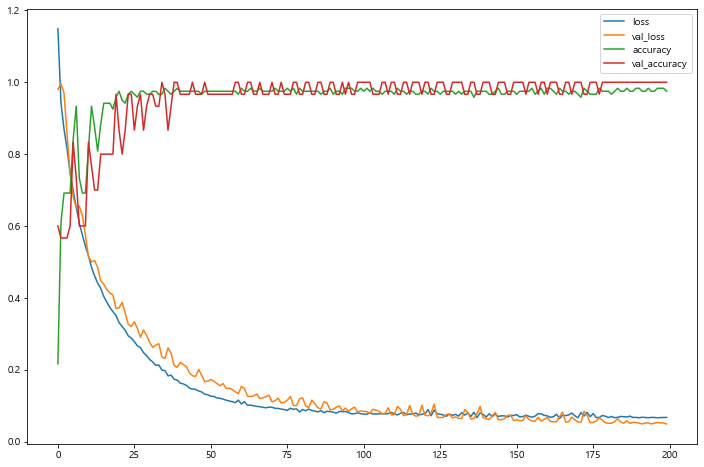

In [38]:
# 시각화 
print(hist.history.keys()) # ['val_loss', 'val_accuracy', 'loss', 'accuracy']
plt.figure(figsize=(12, 8))
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.legend(["loss", "val_loss", "accuracy", "val_accuracy" ])

In [39]:
# 모델 평가 
loss, acc = model.evaluate(X_test, y_test)
print(loss, acc) # [0.12446773160760276, 0.9728000164031982]

30/30 [==============================] - 0s 33us/step
0.048702679574489594 1.0


In [43]:
# 예측 테스트 
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis= 1)
y_pred_class = np.argmax(y_pred, axis = 1)
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

print("--------------------------------------------")
test_set = np. array([[5, 2.9, 1, 0.2]])
print("품종 예측:", iris["species"].unique()[model.predict_classes(test_set)])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
--------------------------------------------
품종 예측: ['setosa']


### MNIST를 이용한 CNN 

(60000, 28, 28) (10000, 28, 28)
[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


(60000, 28, 28) (10000, 28, 28)
[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [130]:
from keras import layers
# Convolution Layer 모델 작성 
# 필터 갯수 32개, 필터 크기는 3*3 

model = Sequential()

# 첫 번째 conv layer 
model.add(keras.layers.Conv2D(32, (3,3), activation = "relu", input_shape=(28, 28, 1 ))) 
# 이미지이기 떄문에 input_shape은 3차원으로 
model.add(layers.MaxPool2D(2,2))

# 두 번째 conv layer
model.add(layers.Conv2D(64, (3,3), activation = "relu")) 
model.add(layers.MaxPool2D(2,2))

# 세 번째 conv layer
model.add(layers.Conv2D(64, (3,3), activation = "relu")) 

# FC 
model.add(layers.Flatten())
model.add(Dense(64, activation = "relu")) 
#conv layer에서 계속 출력하고 있으므로 input_shape을 또 할 필요가 없다.
model.add(Dense(10, activation = "softmax"))
model.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_9 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 64)              

In [132]:
from keras.datasets import mnist  
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train[0:10])

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(y_train[0:10])

# 표준화  
X_train = X_train.reshape(60000, 28, 28, 1).astype("float32") / 255  # FC가 아니기 때문에 다시 4차원으로
X_test = X_test.reshape(10000, 28, 28, 1).astype("float32") / 255 


(60000, 28, 28) (10000, 28, 28)
[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [133]:

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics = ["accuracy"])
model.fit(X_train, y_train, epochs=5, batch_size= 100)

Epoch 1/10
60000/60000 [==============================] - 16s 270us/step - loss: 0.2146 - accuracy: 0.9341
Epoch 2/10
60000/60000 [==============================] - 15s 249us/step - loss: 0.0571 - accuracy: 0.9820
Epoch 3/10
60000/60000 [==============================] - 15s 251us/step - loss: 0.0411 - accuracy: 0.9872
Epoch 4/10
60000/60000 [==============================] - 15s 248us/step - loss: 0.0308 - accuracy: 0.9903
Epoch 5/10
60000/60000 [==============================] - 15s 248us/step - loss: 0.0256 - accuracy: 0.9919
Epoch 6/10
60000/60000 [==============================] - 15s 247us/step - loss: 0.0205 - accuracy: 0.9937
Epoch 7/10
60000/60000 [==============================] - 15s 254us/step - loss: 0.0171 - accuracy: 0.9944
Epoch 8/10
60000/60000 [==============================] - 15s 254us/step - loss: 0.0160 - accuracy: 0.9947
Epoch 9/10
60000/60000 [==============================] - 15s 251us/step - loss: 0.0121 - accuracy: 0.9959
Epoch 10/10
60000/60000 [============

### RNN - LSTM

##### 1. 샘플분석
- 로이터 뉴스

In [2]:
from keras.datasets import reuters

In [135]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)
# 훈련용과 테스트용의 비율 test_split
# num_words는 데이터에서 등장 빈도 순위로 몇번째 해당하는 단어까지만 사용할 것인지를 지정
# num_words 가 None일 경우 모든 단어 사용 /  100이면 1위부터100위까지 사용

print("훈련용 뉴스 기사 :", len(X_train))
print("테스트용 뉴스 기사 :", len(X_test))
print("카테고리 : ", max(y_train)+1)

2113536/2110848 [==============================] - 2s 1us/step
훈련용 뉴스 기사 : 8982
테스트용 뉴스 기사 : 2246
카테고리 :  46


In [139]:
# 첫번째 훈련용 뉴스 기사 
# 각 숫자들은 단어의 빈도수의 순위(1이 가장 높음)
print(X_train[0]) 
print(y_train[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


최대 길이 : 2376
평균 길이 : 145.5398574927633


Text(0, 0.5, '샘플의 갯수')

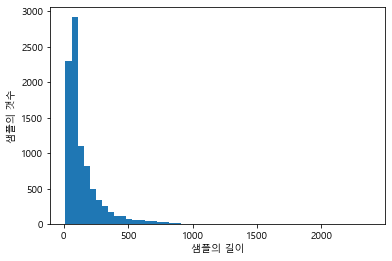

In [153]:
# 뉴스 기사의 길이 
print("최대 길이 :", max(len(l) for l in X_train)) 
# 2376개의 단어를 사용한 기사

# 평균길이
print("평균 길이 :", sum(map(len, X_train)) / len(X_train))

plt.hist([len(s)for s in X_train], bins = 50)
plt.xlabel("샘플의 길이")
plt.ylabel("샘플의 갯수")

C:\Users\Master\anaconda3\envs\tf1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

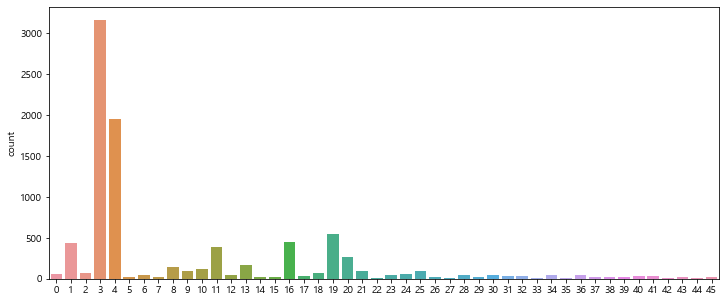

In [154]:
# 카테고리별 빈도수 
fig, axe = plt.subplots(ncols =1)
fig.set_size_inches(12, 5)
sns.countplot(y_train)

In [158]:
# 카테고리별 정확한 빈도수 확인 
unique_element, counts_element = np.unique(y_train, return_counts= True)
print(np.asarray((unique_element, counts_element)))

[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [159]:
# 각 단어별 인덱스 확인
word_to_index = reuters.get_word_index()
print(word_to_index)

557056/550378 [==============================] - 1s 1us/step
{'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, 'woods': 8803, 'hanging': 13796, 'localized': 20672, 'sation': 20673, 'chanthaburi': 20675, 'refunding': 10997, 'hermann': 8804, 'passsengers': 20676, 'stipulate': 20677, 'heublein': 8352, 'screaming': 20713, 'tcby': 16261, 'four': 185, 'grains': 1642, 'broiler': 20680, 'wooden': 12090, 'wednesday': 1220, 'highveld': 13797, 'duffour': 7593, '0053': 20681, 'elections': 3914, '270': 2563, '271': 3551, '272': 5113, '273': 3552, '274': 3400, 'rudman': 7975, '276': 3401, '277': 3478, '278': 3632, '279': 4309, 'dormancy': 9381, 'errors': 7247, 'deferred': 3086, 'sptnd': 20683, 'cooking': 8805, 'stratabit': 20684, 'designing': 16262, 'metalurgicos': 20685, 'databank': 13798, '300er': 20686, 'shocks': 20687, 'nawg': 7972, 'tnta': 20688, 'perforations': 20689, 'affiliates': 2891, '27p': 20690, 'ching': 16263, 'china': 595, 'wagyu': 16264, 'affiliated': 3189, 'chino': 16265, 'chinh': 162

In [164]:
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value] = key

In [168]:
print("빈도수 상위 28842번 단어 :", index_to_word[28842])
print("빈도수 상위 1번 단어 :", index_to_word[1])

빈도수 상위 28842번 단어 : nondiscriminatory
빈도수 상위 1번 단어 : the


In [169]:
# 디코딩 
print(' '.join([index_to_word[index]for index in X_train[0]]))

the wattie nondiscriminatory mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs


##### 2. RNN 분석을 위한 데이터 수집

In [3]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=30000, maxlen =50 , test_split=0.3)

In [4]:
# 문장의 길이를 맞춰준다
from keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, padding="post") # post 비어있는 곳은 0으로 채워준다.
X_test = pad_sequences(X_test, padding="post")
X_train[0]
len(X_train[0])
X_train.shape

(1395, 49)

In [5]:
from keras.utils import to_categorical
#X_train = X_train.reshape((-1, 49, 1))
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],1))
#X_test = X_test.reshape((-1, 49, 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],1))
print(X_train.shape)
print(X_test.shape)

y_data = np.concatenate((y_train, y_test))
y_data = to_categorical(y_data)
y_data

y_train = y_data[:1395]
y_test =  y_data[1395:]
print(y_train.shape)
print(y_test.shape)

(1395, 49, 1)
(599, 49, 1)
(1395, 46)
(599, 46)


##### 3. Vanilla RNN을 이용한 다중 모델

In [6]:
from keras.layers import SimpleRNN
from keras.wrappers.scikit_learn import KerasClassifier

In [7]:
# 단층 RNN
# return_sequences : 메모리셀이 모든 시점(Time Step)에 대해서 은닉상태값을 출력할때 True  
#                    다층 모델일 경우에도 True
#                    메모리셀이 하나의 은닉 상태값만 출력할 때 False
def vanilla_rnn():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape=(49, 1),return_sequences=False))
    model.add(Dense(46, activation="softmax"))
    
    model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])
    return model 

In [8]:
model = KerasClassifier(build_fn = vanilla_rnn, epochs = 200, batch_size=50, verbose=1) 
# fit에서 했던걸 먼저 지정해 줄 수 있다.
model.fit(X_train, y_train)
# loss: 0.8724 - accuracy: 0.7391

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Epoch 1/200
1395/1395 [==============================] - 0s 235us/step - loss: 2.8490 - accuracy: 0.5068
Epoch 2/200
1395/1395 [==============================] - 0s 89us/step - loss: 1.3988 - accuracy: 0.7147
Epoch 3/200
1395/1395 [==============================] - 0s 92us/step - loss: 1.2196 - accuracy: 0.7147
Epoch 4/200
1395/1395 [==============================] - 0s 95us/step - loss: 1.1803 - accuracy: 0.7147
Epoch 5/200
1395/1395 [==============================] - 0s 95us/step - loss: 1.1664 - accuracy: 0.7147
Epoch 6/200
1395/1395 [==============================] - 0s 92us/step - loss: 1.1590 - accuracy: 0.7147
Epoch 7/200
1395/1395 [==============================] - 0s 91us/step - loss: 1.1551 - accuracy: 0.7147
Epoch 8/200
1395/1395 [==============================] - 0s 94us/step - loss: 1.1525 - accuracy: 0.7147
Epoch 9/200
1395/1395 [==============================] - 0s 92us/step - loss: 1.1514 

1395/1395 [==============================] - 0s 92us/step - loss: 0.8846 - accuracy: 0.7369
Epoch 151/200
1395/1395 [==============================] - 0s 94us/step - loss: 0.8771 - accuracy: 0.7369
Epoch 152/200
1395/1395 [==============================] - 0s 91us/step - loss: 0.8568 - accuracy: 0.7419
Epoch 153/200
1395/1395 [==============================] - 0s 91us/step - loss: 0.8475 - accuracy: 0.7455
Epoch 154/200
1395/1395 [==============================] - 0s 92us/step - loss: 0.8549 - accuracy: 0.7427
Epoch 155/200
1395/1395 [==============================] - 0s 91us/step - loss: 0.8574 - accuracy: 0.7477
Epoch 156/200
1395/1395 [==============================] - 0s 93us/step - loss: 0.8646 - accuracy: 0.7412
Epoch 157/200
1395/1395 [==============================] - 0s 94us/step - loss: 0.8487 - accuracy: 0.7448
Epoch 158/200
1395/1395 [==============================] - 0s 96us/step - loss: 0.8494 - accuracy: 0.7398
Epoch 159/200
1395/1395 [==============================] - 0

In [212]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_test_ =np.argmax(y_test, axis =1 ) 
print(accuracy_score(y_pred, y_test_)) #  0.7545909849749582

599/599 [==============================] - 0s 62us/step
0.7545909849749582


In [9]:
# 다층 RNN
def stack_vanilla_rnn():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape=(49, 1),return_sequences=True))
    model.add(SimpleRNN(50, return_sequences=False)) # 마지막만 False 
    model.add(Dense(46, activation="softmax"))
    
    model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])
    return model 

In [10]:
model = KerasClassifier(build_fn = stack_vanilla_rnn, epochs = 200, batch_size=50, verbose=1) 
model.fit(X_train, y_train)
# loss: 0.4004 - accuracy: 0.8581

Epoch 1/200
1395/1395 [==============================] - 0s 330us/step - loss: 2.7644 - accuracy: 0.4595
Epoch 2/200
1395/1395 [==============================] - 0s 202us/step - loss: 1.2512 - accuracy: 0.7147
Epoch 3/200
1395/1395 [==============================] - 0s 182us/step - loss: 1.1672 - accuracy: 0.7147
Epoch 4/200
1395/1395 [==============================] - 0s 186us/step - loss: 1.1524 - accuracy: 0.7147
Epoch 5/200
1395/1395 [==============================] - 0s 190us/step - loss: 1.1287 - accuracy: 0.7133
Epoch 6/200
1395/1395 [==============================] - 0s 193us/step - loss: 1.1142 - accuracy: 0.7133
Epoch 7/200
1395/1395 [==============================] - 0s 186us/step - loss: 1.1053 - accuracy: 0.7147
Epoch 8/200
1395/1395 [==============================] - 0s 183us/step - loss: 1.0926 - accuracy: 0.7147
Epoch 9/200
1395/1395 [==============================] - 0s 183us/step - loss: 1.0842 - accuracy: 0.7104
Epoch 10/200
1395/1395 [==============================]

1395/1395 [==============================] - 0s 183us/step - loss: 0.7427 - accuracy: 0.7599
Epoch 79/200
1395/1395 [==============================] - 0s 183us/step - loss: 0.7381 - accuracy: 0.7570
Epoch 80/200
1395/1395 [==============================] - 0s 181us/step - loss: 0.7410 - accuracy: 0.7548
Epoch 81/200
1395/1395 [==============================] - 0s 182us/step - loss: 0.7338 - accuracy: 0.7613
Epoch 82/200
1395/1395 [==============================] - 0s 182us/step - loss: 0.7367 - accuracy: 0.7620
Epoch 83/200
1395/1395 [==============================] - 0s 184us/step - loss: 0.7360 - accuracy: 0.7541
Epoch 84/200
1395/1395 [==============================] - 0s 181us/step - loss: 0.7243 - accuracy: 0.7620
Epoch 85/200
1395/1395 [==============================] - 0s 181us/step - loss: 0.7216 - accuracy: 0.7599
Epoch 86/200
1395/1395 [==============================] - 0s 183us/step - loss: 0.7177 - accuracy: 0.7577
Epoch 87/200
1395/1395 [==============================] - 0

In [11]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_test_ =np.argmax(y_test, axis =1 ) 
print(accuracy_score(y_pred, y_test_)) #  0.7529215358931552      
# 훈련데이터보다 테스트 데이터의 정확도가 굉장히 낮음 ->  과적합이 굉장히 심함

599/599 [==============================] - 0s 181us/step
0.7529215358931552


##### 4. LSTM

In [13]:
from keras.layers import LSTM
def lstm_rnn():
    model = Sequential()
    model.add(LSTM(50, input_shape=(49, 1),return_sequences=False))
    model.add(Dense(46, activation="softmax"))
    
    model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])
    return model 

In [14]:
model = KerasClassifier(build_fn = lstm_rnn, epochs = 200, batch_size=50, verbose=1) 
model.fit(X_train, y_train)
#  0s 272us/step - loss: 0.3972 - accuracy: 0.8810 

Epoch 1/200
1395/1395 [==============================] - 1s 396us/step - loss: 3.4337 - accuracy: 0.5484
Epoch 2/200
1395/1395 [==============================] - 0s 258us/step - loss: 1.5282 - accuracy: 0.7118
Epoch 3/200
1395/1395 [==============================] - 0s 258us/step - loss: 1.1753 - accuracy: 0.7147
Epoch 4/200
1395/1395 [==============================] - 0s 260us/step - loss: 1.1349 - accuracy: 0.7147
Epoch 5/200
1395/1395 [==============================] - 0s 259us/step - loss: 1.1181 - accuracy: 0.7147
Epoch 6/200
1395/1395 [==============================] - 0s 261us/step - loss: 1.1035 - accuracy: 0.7147
Epoch 7/200
1395/1395 [==============================] - 0s 264us/step - loss: 1.0881 - accuracy: 0.7147
Epoch 8/200
1395/1395 [==============================] - 0s 265us/step - loss: 1.0674 - accuracy: 0.7147
Epoch 9/200
1395/1395 [==============================] - 0s 265us/step - loss: 1.0120 - accuracy: 0.7269
Epoch 10/200
1395/1395 [==============================]

1395/1395 [==============================] - 0s 264us/step - loss: 0.6181 - accuracy: 0.8430
Epoch 79/200
1395/1395 [==============================] - 0s 265us/step - loss: 0.6582 - accuracy: 0.8366
Epoch 80/200
1395/1395 [==============================] - 0s 263us/step - loss: 0.7907 - accuracy: 0.8065
Epoch 81/200
1395/1395 [==============================] - 0s 263us/step - loss: 0.6656 - accuracy: 0.8280
Epoch 82/200
1395/1395 [==============================] - 0s 263us/step - loss: 0.6365 - accuracy: 0.8358
Epoch 83/200
1395/1395 [==============================] - 0s 262us/step - loss: 0.6431 - accuracy: 0.8337
Epoch 84/200
1395/1395 [==============================] - 0s 263us/step - loss: 0.6221 - accuracy: 0.8380
Epoch 85/200
1395/1395 [==============================] - 0s 261us/step - loss: 0.6134 - accuracy: 0.8401
Epoch 86/200
1395/1395 [==============================] - 0s 263us/step - loss: 0.6188 - accuracy: 0.8401
Epoch 87/200
1395/1395 [==============================] - 0

In [15]:
y_pred = model.predict(X_test)
y_test_ =np.argmax(y_test, axis =1 ) 
print(accuracy_score(y_pred, y_test_))
# 0.8380634390651085

599/599 [==============================] - 0s 256us/step
0.8380634390651085


In [21]:
# 다층(multil layer, stacked) LSTM 
def stack_lstm_rnn():
    model = Sequential()
    model.add(LSTM(50, input_shape=(49, 1),return_sequences=True))
    model.add(LSTM(50,return_sequences=True))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(46, activation="softmax"))
    
    model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])
    return model 

In [ ]:
model = KerasClassifier(build_fn = stack_lstm_rnn, epochs = 200, batch_size=50, verbose=1) 
model.fit(X_train, y_train)
# loss: 0.1395 - accuracy: 0.9634

Epoch 1/200
1395/1395 [==============================] - 2s 1ms/step - loss: 2.3984 - accuracy: 0.6738
Epoch 2/200
1395/1395 [==============================] - 1s 857us/step - loss: 1.2372 - accuracy: 0.7147
Epoch 3/200
1395/1395 [==============================] - 1s 848us/step - loss: 1.1789 - accuracy: 0.7147
Epoch 4/200
1395/1395 [==============================] - 1s 860us/step - loss: 1.1685 - accuracy: 0.7147
Epoch 5/200
1395/1395 [==============================] - 1s 860us/step - loss: 1.1473 - accuracy: 0.7147
Epoch 6/200
1395/1395 [==============================] - 1s 859us/step - loss: 1.1218 - accuracy: 0.7147
Epoch 7/200
1395/1395 [==============================] - 1s 864us/step - loss: 1.0279 - accuracy: 0.72331s - loss:
Epoch 8/200
1395/1395 [==============================] - 1s 856us/step - loss: 0.9056 - accuracy: 0.7907
Epoch 9/200
1395/1395 [==============================] - 1s 859us/step - loss: 0.8683 - accuracy: 0.7921
Epoch 10/200
1395/1395 [=======================

In [20]:
y_pred = model.predict(X_test)
y_test_ =np.argmax(y_test, axis =1 ) 
print(accuracy_score(y_pred, y_test_))

599/599 [==============================] - 0s 189us/step
0.8497495826377296


In [ ]:
# 실전 개발 : 6장 챕터1, 챕터 2 / 챕터5~ 